# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Environment and Mandatory Packages

In [2]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT2",
)
at.run()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT2/data


### 0.b Disable Warnings Messages

In [3]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

### 0.d Import Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [4]:
# Core Packages
import numpy as np
import altair as alt
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Statistical Tests
from scipy.stats import f_oneway, chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.inspection import permutation_importance

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Machine Learning - Modeling
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier


# Machine Learning - Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


---
## A. Project Description


In [5]:
student_name = "Biplav Adhikari"
student_id = "11909379"

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [8]:
business_objective = """ To build a predictive model that forecasts student academic performance in the current semester, enabling the university to proactively allocate resources and deliver targeted academic support to students most at risk. """

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_objective', value=business_objective)

---
## B. Experiment Description

In [10]:
# Do not modify this code
experiment_id = 0
print_tile(size="h1", key='experiment_id', value=experiment_id)

In [11]:
# <Student to fill this section><Present the hypothesis you want to test, the question you want to answer or the insight you are seeking. Explain the reasons why you think it is worthwhile considering it>

experiment_hypothesis = """
Cleaning and refining the dataset through feature engineering and EDA will help identify the most meaningful features,
resulting in a more efficient and accurate baseline model for predicting student performance.

"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='experiment_hypothesis', value=experiment_hypothesis)

In [13]:
# <Student to fill this section>
experiment_expectations = """

Expected outcome of the experiment:
The goal is to clean the dataset, engineer key features, and prepare data for modeling.
Run a dummy model that sets a baseline to compare performance in future experiments.

Possible Scenarios from this experiment:
If the dummy model performs well, it may indicate class imbalance; if it performs poorly, it sets a realistic baseline.
If future models can't beat the baseline, feature selection may need refinement or better predictive signals.
"""

In [14]:
# Do not modify this code
print_tile(size="h3", key='experiment_expectations', value=experiment_expectations)

---
## C. Data Understanding

### C.1   Load Dataset

> Do not change this code

In [15]:
# Do not modify this code
try:
  df = pd.read_csv(at.folder_path / "students_performance.csv")
except Exception as e:
  print(e)

### C.2 Explore Dataset

> You can add more cells in this section

In [16]:
df.head()

,student_id,full_name,age,email,phone_number,gender,birth_country,secondary_address,building_number,street_name,...,social_media_hours,average_attendance,skills,skills_development_hours,area_of_interest,previous_gpa,current_gpa,completed_credits,has_diploma,house_income
0,7,Lauren Moon,22.0,kimberlypark@example.org,(08)35431944,Female,AU,Unit 93,0,April Amble,...,2.0,100.0,Web development skill(Frontend),1.0,Networking,3.80,3.64,35.0,False,32500.0
1,11,Larry Green,22.0,smithamy@example.net,(07)35774291,Male,AU,Level 2,43,Davis Crest,...,2.0,90.0,Programming,1.0,Data Science,3.40,3.53,35.0,False,20000.0
2,15,Alexander Scott,20.0,qlee@example.org,20356212,Male,NZ,937/,96,Emily Little,...,1.0,95.0,Programming,3.0,Machine Learning / Deep Learning,3.93,3.89,35.0,False,30000.0
3,18,Jonathan Thornton,21.0,cmorgan@example.com,0627-6253,Male,AU,Level 3,5,William Pathway,...,3.0,95.0,Programming,1.0,Artificial Intelligence,3.10,3.50,35.0,False,25000.0
4,20,Susan Smith,21.0,xtodd@example.com,9957-3583,Female,AU,00/,5,Martin Close,...,2.0,96.0,Web development skill(Frontend),1.0,Web Development,3.81,3.65,34.0,False,30000.0


In [17]:
df.describe()

,student_id,age,building_number,postcode,admission_year,hsc_year,current _semester,study_hours,study_sessions,social_media_hours,average_attendance,skills_development_hours,previous_gpa,current_gpa,completed_credits,house_income
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,673.108028,21.368285,180.305253,3153.528246,2040.321110,2019.251734,43.000991,3.334616,2.066898,3.439296,88.111001,2.224975,2.756482,3.211343,76.936571,6.349576e+04
std,311.377223,1.614943,273.531962,1768.243964,629.677177,1.346681,266.874155,2.096762,1.034492,2.439363,16.079094,1.473957,0.858012,0.731698,47.733885,7.927658e+04
min,7.000000,18.000000,0.000000,202.000000,2013.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.530000e+03
25%,410.000000,20.000000,6.000000,2602.000000,2020.000000,2019.000000,3.000000,2.000000,1.000000,2.000000,80.000000,1.000000,2.110000,2.880000,24.000000,3.000000e+04
50%,685.000000,21.000000,46.000000,2691.000000,2021.000000,2020.000000,8.000000,3.000000,2.000000,3.000000,95.000000,2.000000,2.770000,3.390000,85.000000,5.000000e+04
75%,941.000000,22.000000,237.000000,2960.000000,2022.000000,2020.000000,10.000000,4.000000,2.000000,4.000000,100.000000,3.000000,3.480000,3.710000,122.000000,7.700000e+04
max,1193.000000,26.000000,998.000000,9941.000000,22022.000000,2028.000000,2022.000000,30.000000,10.000000,20.000000,100.000000,20.000000,5.000000,4.670000,147.000000,2.000000e+06


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   student_id                1009 non-null   int64  
 1   full_name                 1009 non-null   object 
 2   age                       1009 non-null   float64
 3   email                     1009 non-null   object 
 4   phone_number              1009 non-null   object 
 5   gender                    1009 non-null   object 
 6   birth_country             1009 non-null   object 
 7   secondary_address         1009 non-null   object 
 8   building_number           1009 non-null   int64  
 9   street_name               1009 non-null   object 
 10  street_suffix             1009 non-null   object 
 11  city                      1009 non-null   object 
 12  postcode                  1009 non-null   int64  
 13  state_abbr                1009 non-null   object 
 14  admissio

In [19]:
dtypes = df.dtypes.sort_values()
print('sorted datat types:', dtypes)

#counting numerical and categorical data types
numeric_count = 0
object_count = 0

for dtype in df.dtypes:
  if np.issubdtype(dtype, np.number):
    numeric_count +=1
  else:
    object_count +=1

print('Number of numerical columns:', numeric_count)
print('Number of object columns:', object_count)

sorted datat types: has_diploma                    bool
student_id                    int64
building_number               int64
postcode                      int64
completed_credits           float64
current_gpa                 float64
previous_gpa                float64
skills_development_hours    float64
average_attendance          float64
social_media_hours          float64
study_sessions              float64
study_hours                 float64
current _semester           float64
hsc_year                    float64
house_income                float64
age                         float64
admission_year              float64
state_abbr                   object
full_name                    object
email                        object
area_of_interest             object
phone_number                 object
skills                       object
gender                       object
birth_country                object
secondary_address            object
street_name                  object
street_s

In [20]:
print(df.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64') dtype('bool')]


In [21]:
df.shape

(1009, 45)

In [22]:
df.nunique()

,0
student_id,1009
full_name,1001
age,10
email,1006
phone_number,1009
gender,2
birth_country,10
secondary_address,587
building_number,360
street_name,1003


In [23]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print('Columns with missing values')
print(missing_columns)

Columns with missing values
skills              1
area_of_interest    7
dtype: int64


In [24]:
duplicate_values = df.duplicated().sum()
duplicate_columns = duplicate_values[duplicate_values > 0]

print('Columns with duplicate values', duplicate_columns)


Columns with duplicate values []


In [25]:
cols_to_drop = [
    "student_id", "full_name", "email", "phone_number", "secondary_address",
    "building_number", "street_name"
]
df = df.drop(columns=cols_to_drop, errors="ignore")


We manually removed the following features prior to feature selection because they were clearly irrelevant and to save time:

student_id", "full_name", "email", "phone_number", "secondary_address",
    "building_number", "street_name

In [26]:
dataset_insights = """
The dataset contains 1009 rows and 45 columns, with a mix of integer, float, object, and boolean data types.
An initial review shows some odd values, such as an HSC year of 2028 and an admission year of 22022, which may be errors or outliers requiring correction.
There are 1 and 7 missing values in the skills and area_of_interest columns, respectively, and no columns contain duplicated values, which will aid in the data cleaning process.
"""

In [27]:
# Do not modify this code
print_tile(size="h3", key='dataset_insights', value=dataset_insights)

### C.3 Explore Target Variable

> Save the name of column used as the target variable and call it `target_name`

> You can add more cells in this section

In [28]:
target_name = 'target'

unique_target = df[target_name].unique()
print('Unique Target List:', unique_target)

Unique Target List: ['Good' 'Average' 'Excellent' 'Poor']


--- target ---
Unique: 4
Top values:
 target
Poor         503
Average      272
Good         178
Excellent     56
Name: count, dtype: int64
Missing: 0


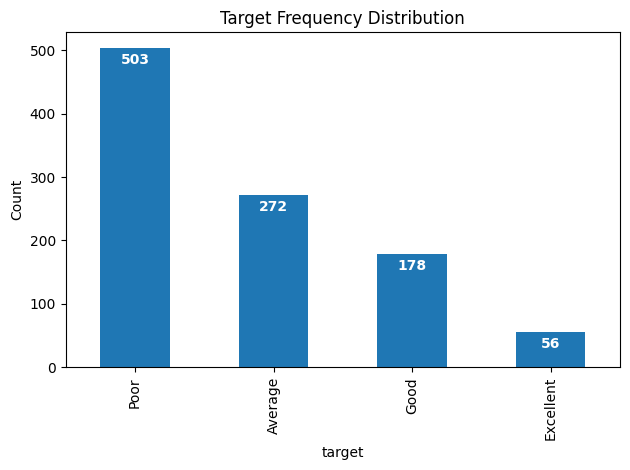

In [29]:
for col in ['target']:
    print(f'--- {col} ---')
    print("Unique:", df[col].nunique())
    print("Top values:\n", df[col].value_counts())
    print("Missing:", df[col].isnull().sum())
    counts = df[col].value_counts()
    ax = counts.plot(kind='bar', title='Target Frequency Distribution')  #bar chart
    for i, count in enumerate(counts):
        ax.text(i, count - 30, str(count), ha='center', va='bottom', fontsize=10, color='white', weight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

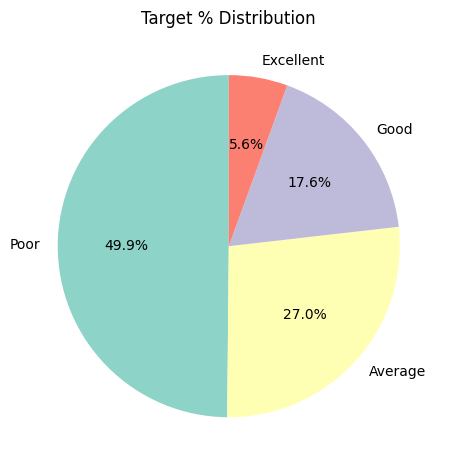

In [30]:
counts = df['target'].value_counts()
labels = counts.index.tolist()

colors = sns.color_palette('Set3', n_colors=len(labels))

# Plot pie chart
counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

plt.ylabel('')
plt.title('Target % Distribution')
plt.tight_layout()
plt.show()


           count      mean       std   min     25%    50%    75%   max
target                                                                
Poor       503.0  2.865308  0.854163  0.00  2.6350  2.910  3.415  4.60
Average    272.0  3.485294  0.369491  2.80  3.1075  3.615  3.800  4.00
Good       178.0  3.560421  0.222309  3.20  3.3900  3.530  3.700  4.67
Excellent   56.0  3.879286  0.079335  3.75  3.8100  3.900  3.940  4.00

Number of students with GPA > 4.0: 2


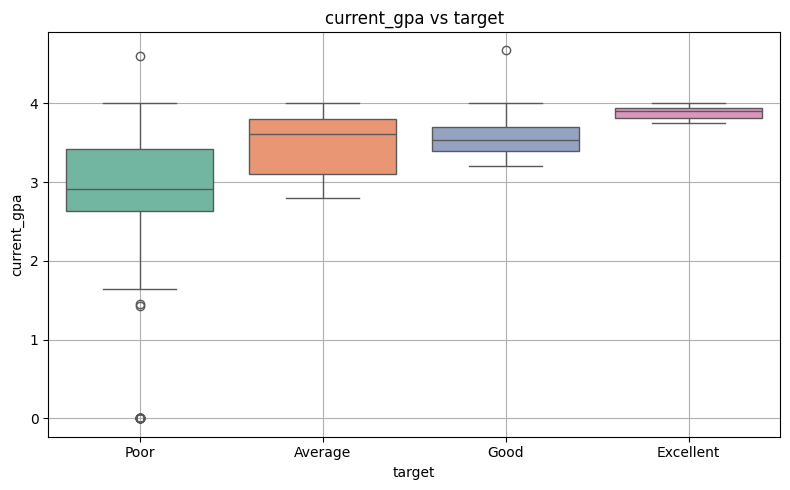

In [31]:
#Understand the relationship between the target and Current GPA

gpa_by_target = df.groupby("target")["current_gpa"].describe()
preferred_order = ['Poor', 'Average', 'Good', 'Excellent']
gpa_by_target = gpa_by_target.loc[preferred_order]
print(gpa_by_target)

# Count of students with GPA > 4.0
count_gpa_above_4 = df[df['current_gpa'] > 4.0].shape[0]
print(f'\nNumber of students with GPA > 4.0: {count_gpa_above_4}')

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='target', y='current_gpa',  order=preferred_order, palette='Set2')
plt.title('current_gpa vs target')
plt.xlabel('target')
plt.ylabel('current_gpa')
plt.grid(True)
plt.tight_layout()
plt.show()

           count       mean        std   min   25%   50%    75%    max
target                                                                
Poor       503.0  81.972167  19.947022   0.0  70.0  90.0  100.0  100.0
Average    272.0  93.169118   8.144502  75.0  87.0  98.0  100.0  100.0
Good       178.0  95.337079   4.436479  85.0  90.0  95.0  100.0  100.0
Excellent   56.0  95.714286   4.180971  90.0  90.0  97.0  100.0  100.0


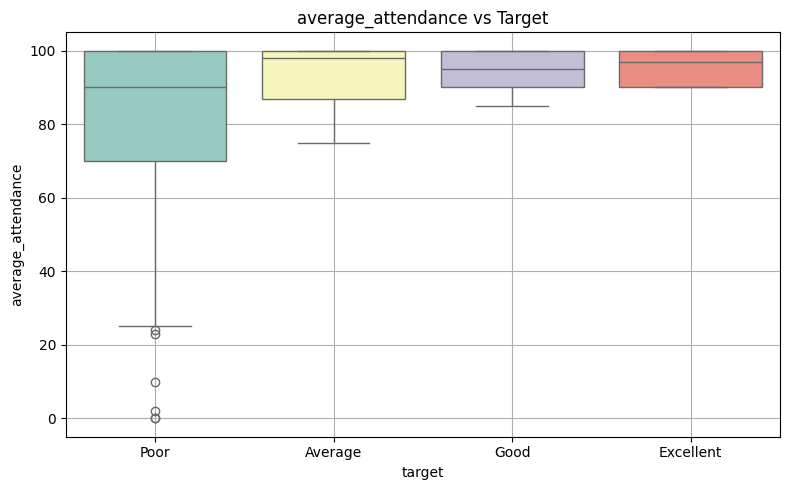

           count      mean       std  min  25%      50%    75%   max
target                                                              
Poor       503.0  3.083915  1.536852  0.0  2.0  3.00000  4.000  11.0
Average    272.0  3.156354  2.785342  1.0  2.0  3.00000  4.000  30.0
Good       178.0  3.862599  2.111532  2.0  2.5  3.34753  4.875  15.0
Excellent   56.0  4.774063  1.642459  3.0  3.5  4.50000  5.500   9.0


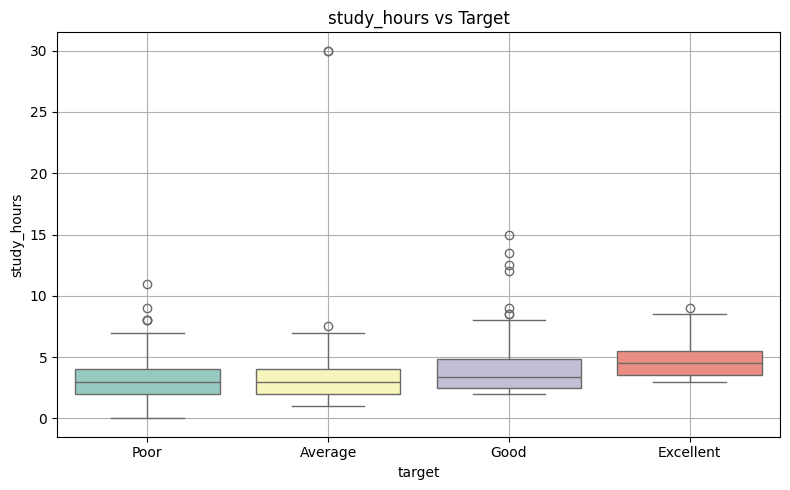

           count      mean       std  min  25%  50%  75%   max
target                                                        
Poor       503.0  2.047714  1.060289  0.0  1.0  2.0  2.0  10.0
Average    272.0  2.060662  1.038465  1.0  1.0  2.0  2.0  10.0
Good       178.0  2.095506  0.983986  0.0  2.0  2.0  2.0   7.0
Excellent   56.0  2.178571  0.950735  0.0  2.0  2.0  2.0   6.0


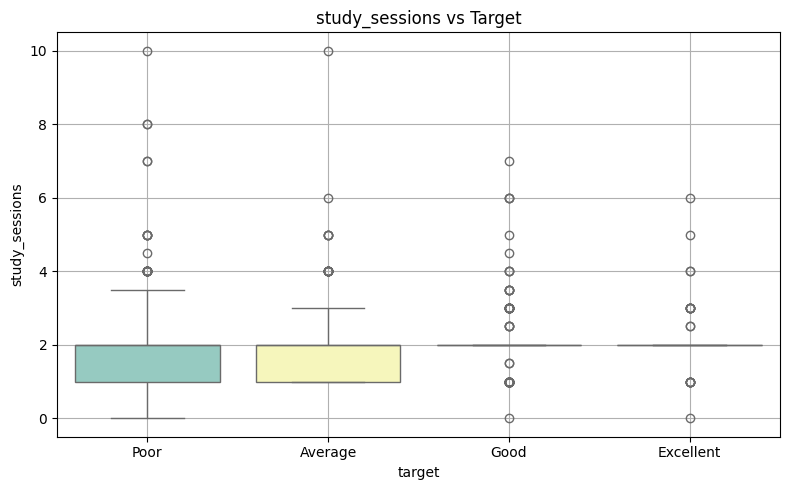

In [32]:
# comparing target with other relevant features

cols_to_explore = ['average_attendance', 'study_hours', 'study_sessions']
preferred_order = ['Poor', 'Average', 'Good', 'Excellent']

for col in cols_to_explore:
  stats = df.groupby('target')[col].describe().loc[preferred_order]
  print(stats)
  plt.figure(figsize=(8,5))
  sns.boxplot(data=df, x='target', y=col, order=preferred_order, palette='Set3')
  plt.title(f'{col} vs Target')
  plt.grid(True)
  plt.tight_layout()
  plt.show()



In [33]:
# <Student to fill this section>
target_insights = """
The target variable, target, represents student performance with four categories: Poor, Average, Good, and Excellent.
It has no missing values and is evenly distributed. Initial analysis showed inconsistencies between the labels and key features like current_GPA and study_hours,
suggesting the classifications are based on a combination of factors rather than a single feature, and require further analysis.
"""

In [34]:
# Do not modify this code
print_tile(size="h3", key='target_insights', value=target_insights)

### C.4 Explore Feature of Interest - Numerical Datatype Features

1.   List item



> You can add more cells in this section

--- age ---
Missing: 0
Unique: 10
count    1009.000000
mean       21.368285
std         1.614943
min        18.000000
25%        20.000000
50%        21.000000
75%        22.000000
max        26.000000
Name: age, dtype: float64


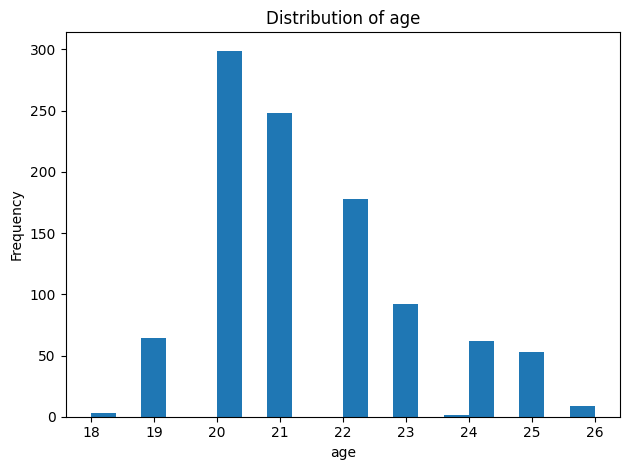

Skewness: 0.7730757292057864
Outliers in age: 9


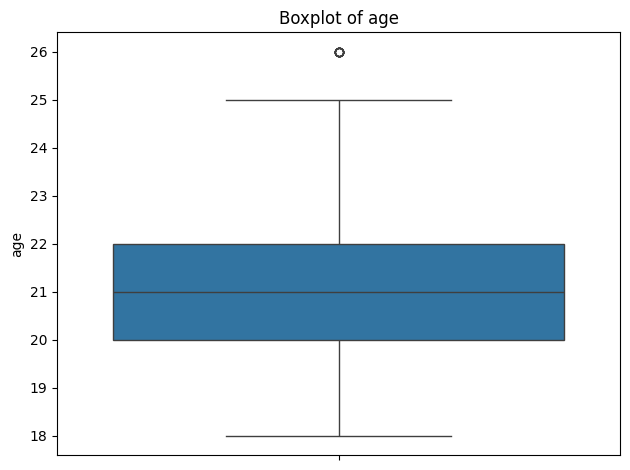

--- current _semester ---
Missing: 0
Unique: 21
count    1009.000000
mean       43.000991
std       266.874155
min         1.000000
25%         3.000000
50%         8.000000
75%        10.000000
max      2022.000000
Name: current _semester, dtype: float64


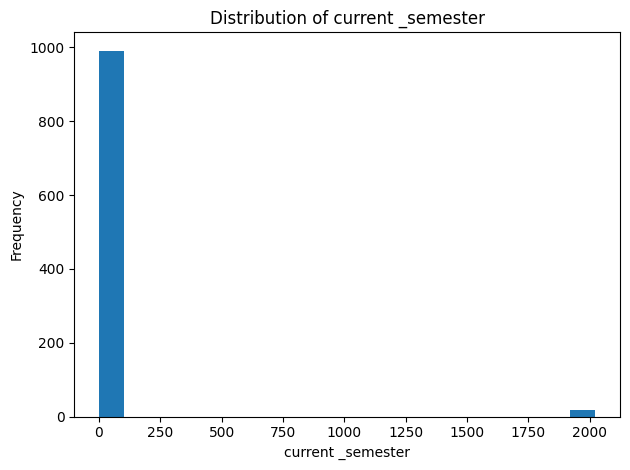

Skewness: 7.293610134324537
Outliers in current _semester: 32


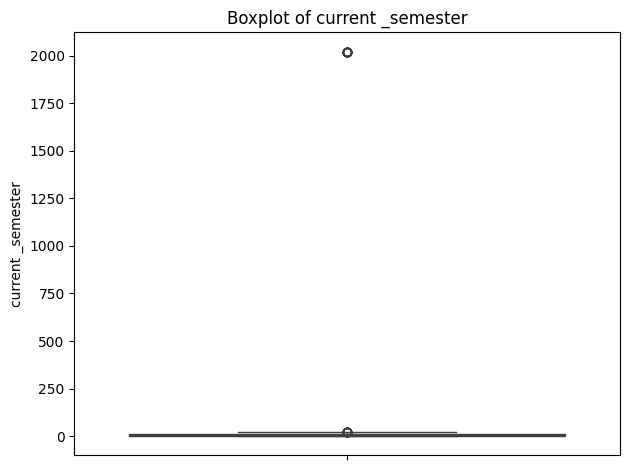

--- study_hours ---
Missing: 0
Unique: 28
count    1009.000000
mean        3.334616
std         2.096762
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        30.000000
Name: study_hours, dtype: float64


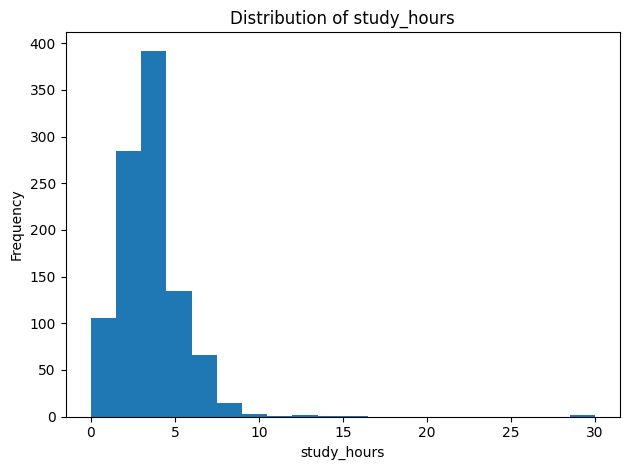

Skewness: 4.824367847544496
Outliers in study_hours: 25


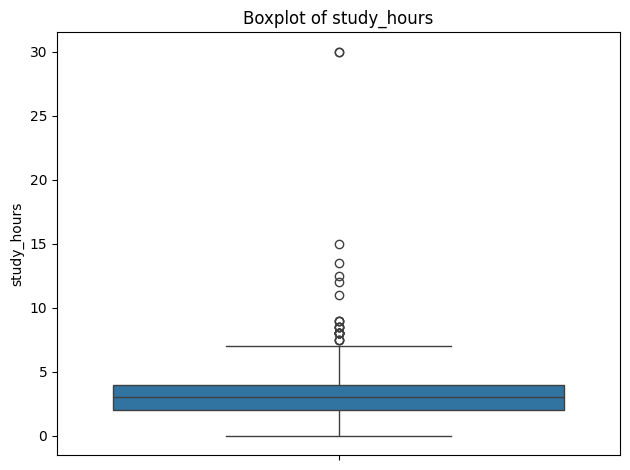

--- study_sessions ---
Missing: 0
Unique: 14
count    1009.000000
mean        2.066898
std         1.034492
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        10.000000
Name: study_sessions, dtype: float64


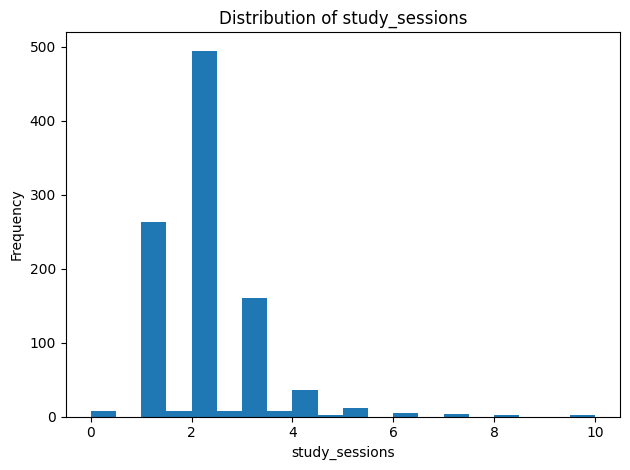

Skewness: 2.1713774234177974
Outliers in study_sessions: 61


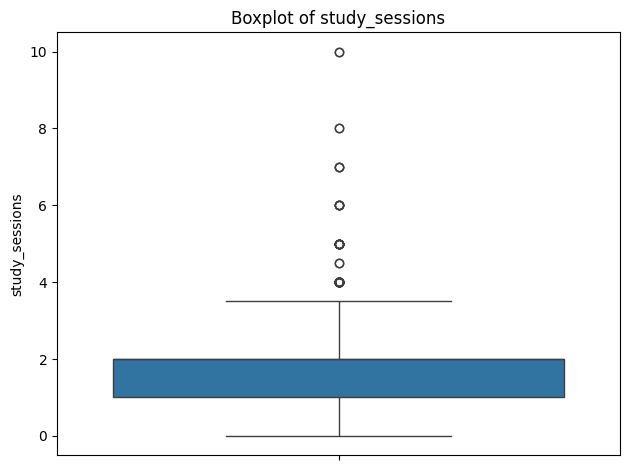

--- social_media_hours ---
Missing: 0
Unique: 19
count    1009.000000
mean        3.439296
std         2.439363
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        20.000000
Name: social_media_hours, dtype: float64


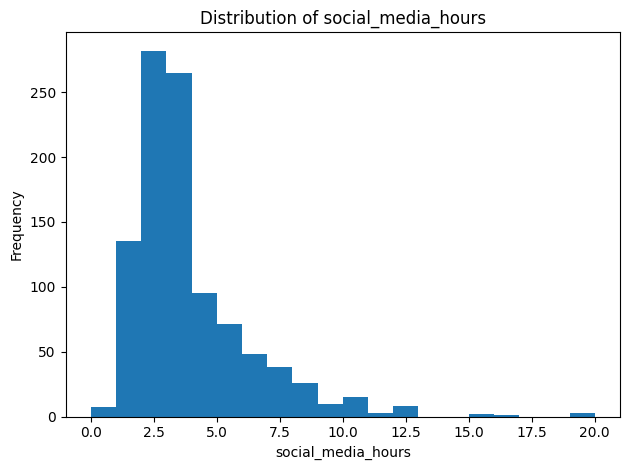

Skewness: 2.276292689997802
Outliers in social_media_hours: 68


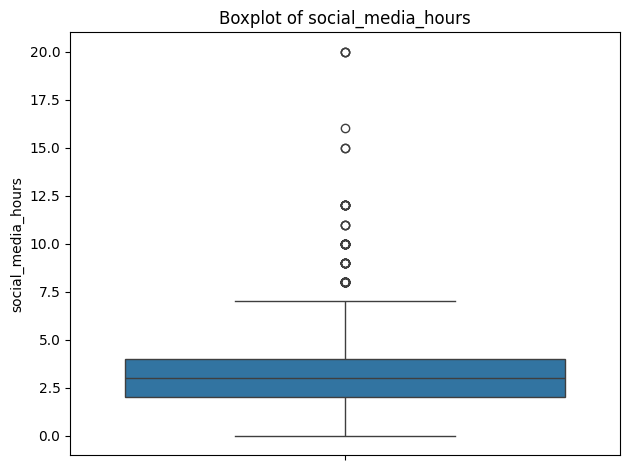

--- average_attendance ---
Missing: 0
Unique: 62
count    1009.000000
mean       88.111001
std        16.079094
min         0.000000
25%        80.000000
50%        95.000000
75%       100.000000
max       100.000000
Name: average_attendance, dtype: float64


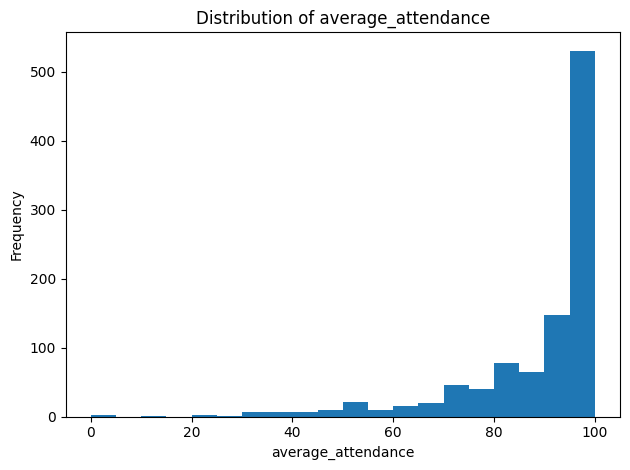

Skewness: -2.024151763298878
Outliers in average_attendance: 36


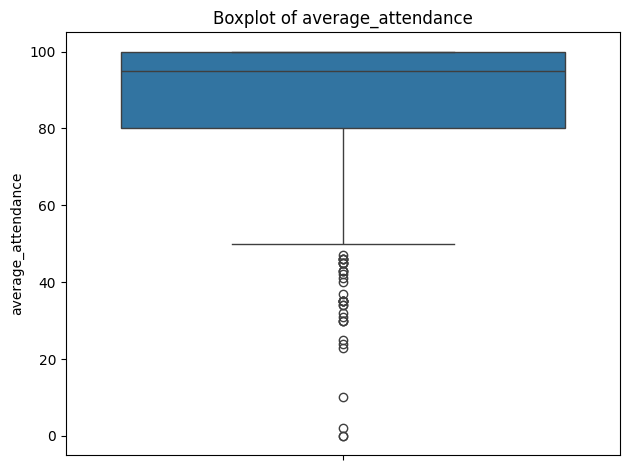

--- skills_development_hours ---
Missing: 0
Unique: 12
count    1009.000000
mean        2.224975
std         1.473957
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: skills_development_hours, dtype: float64


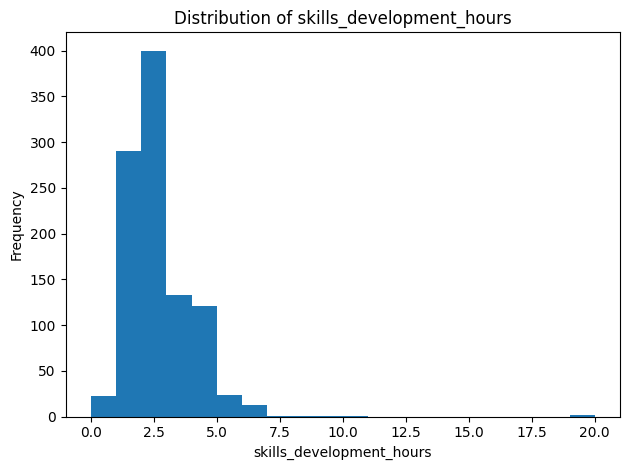

Skewness: 4.1861281777292385
Outliers in skills_development_hours: 6


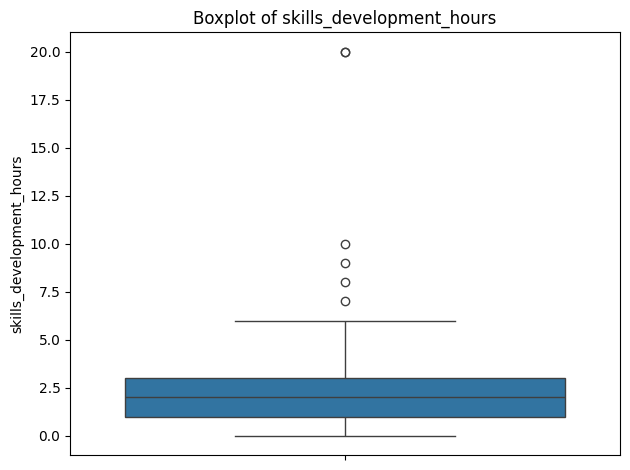

--- previous_gpa ---
Missing: 0
Unique: 251
count    1009.000000
mean        2.756482
std         0.858012
min         0.000000
25%         2.110000
50%         2.770000
75%         3.480000
max         5.000000
Name: previous_gpa, dtype: float64


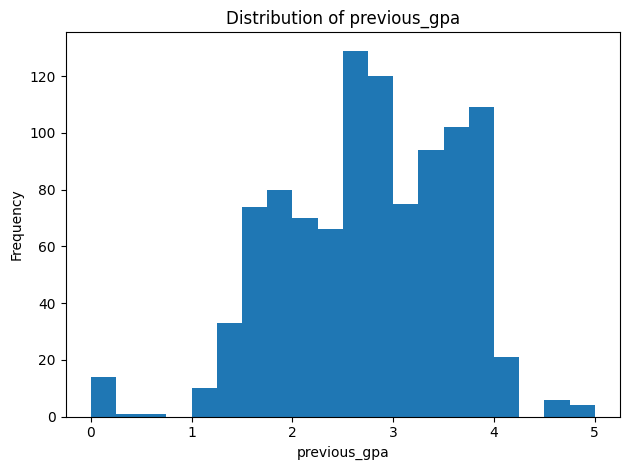

Skewness: -0.43581895832600254
Outliers in previous_gpa: 14


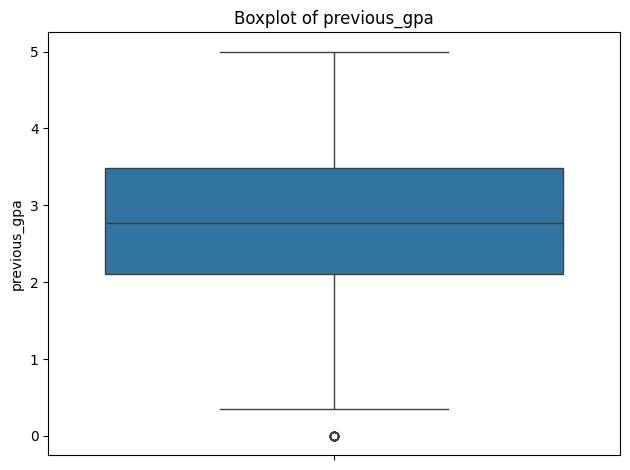

--- current_gpa ---
Missing: 0
Unique: 186
count    1009.000000
mean        3.211343
std         0.731698
min         0.000000
25%         2.880000
50%         3.390000
75%         3.710000
max         4.670000
Name: current_gpa, dtype: float64


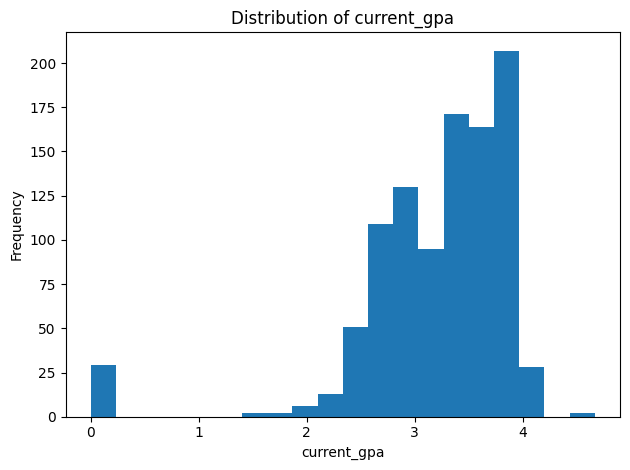

Skewness: -2.4200089742545154
Outliers in current_gpa: 31


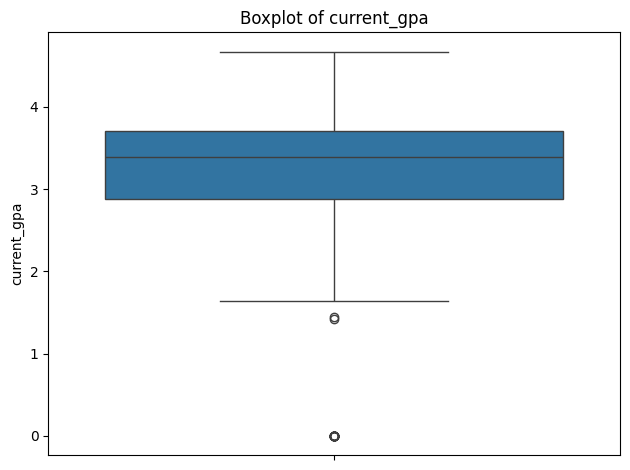

--- completed_credits ---
Missing: 0
Unique: 130
count    1009.000000
mean       76.936571
std        47.733885
min         0.000000
25%        24.000000
50%        85.000000
75%       122.000000
max       147.000000
Name: completed_credits, dtype: float64


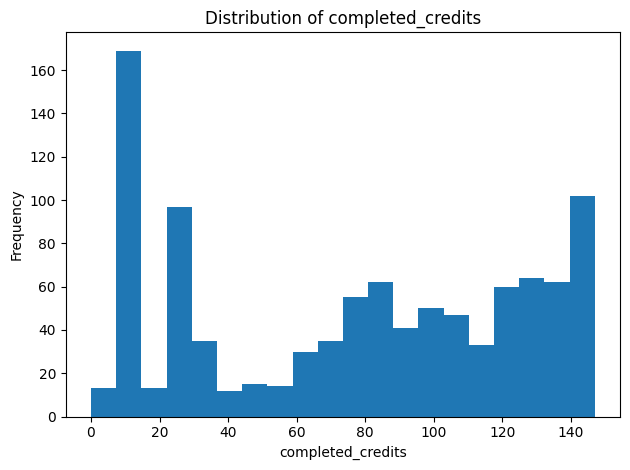

Skewness: -0.12712113262048125
Outliers in completed_credits: 0


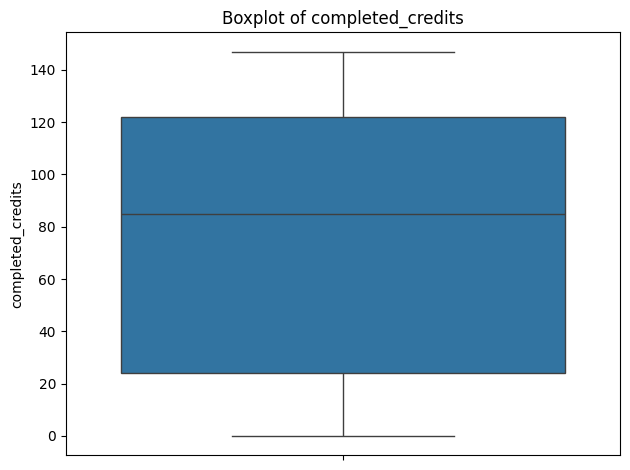

--- house_income ---
Missing: 0
Unique: 139
count    1.009000e+03
mean     6.349576e+04
std      7.927658e+04
min      2.530000e+03
25%      3.000000e+04
50%      5.000000e+04
75%      7.700000e+04
max      2.000000e+06
Name: house_income, dtype: float64


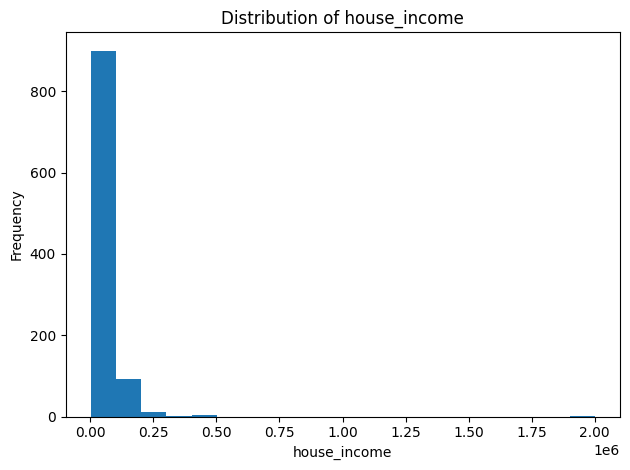

Skewness: 15.390017450508743
Outliers in house_income: 50


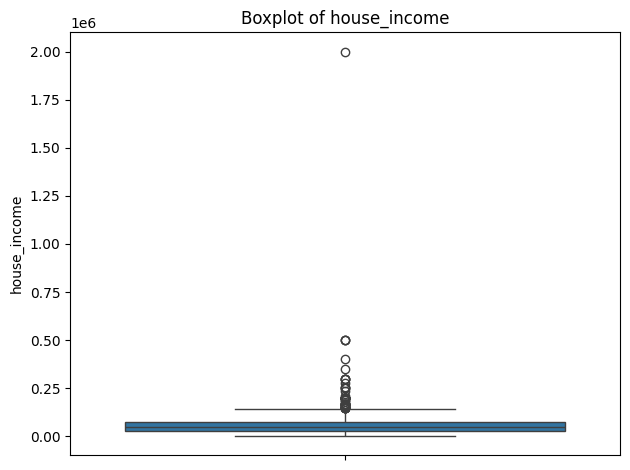


 Top 5 Features by Skewness:
                     Feature  Skewness  Outliers
10              house_income     15.39        50
1          current _semester      7.29        32
2                study_hours      4.82        25
6   skills_development_hours      4.19         6
4         social_media_hours      2.28        68

 Top 5 Features by Outlier Count:
               Feature  Skewness  Outliers
4   social_media_hours      2.28        68
3       study_sessions      2.17        61
10        house_income     15.39        50
5   average_attendance     -2.02        36
1    current _semester      7.29        32


In [35]:
#Analysing selected numerical features called sorted_numericals

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(['postcode', 'admission_year', 'hsc_year'], errors='ignore')  # Removed as postcode is categorical, and hsc_year and admission_year are in datetime format.

analysis = []

for col in numerical_cols:
    print(f"--- {col} ---")
    print("Missing:", df[col].isnull().sum())
    print("Unique:", df[col].nunique())
    print(df[col].describe())

    # Histogram
    df[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    # Skewness
    skew_val = df[col].skew()
    print("Skewness:", skew_val)

    # Outlier detection using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outlier_count = outliers.shape[0]
    print(f"Outliers in {col}: {outlier_count}")

    # Boxplot
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

    analysis.append({
        'Feature': col,
        'Skewness': round(skew_val, 2),
        'Outliers': outlier_count
    })

# Convert to DataFrame and sort
analysis_df = pd.DataFrame(analysis)

print('\n Top 5 Features by Skewness:')
print(analysis_df.sort_values(by='Skewness', ascending=False).head(5))

print('\n Top 5 Features by Outlier Count:')
print(analysis_df.sort_values(by='Outliers', ascending=False).head(5))


Index(['age', 'current _semester', 'study_hours', 'study_sessions',
       'social_media_hours', 'average_attendance', 'skills_development_hours',
       'previous_gpa', 'current_gpa', 'completed_credits', 'house_income'],
      dtype='object')


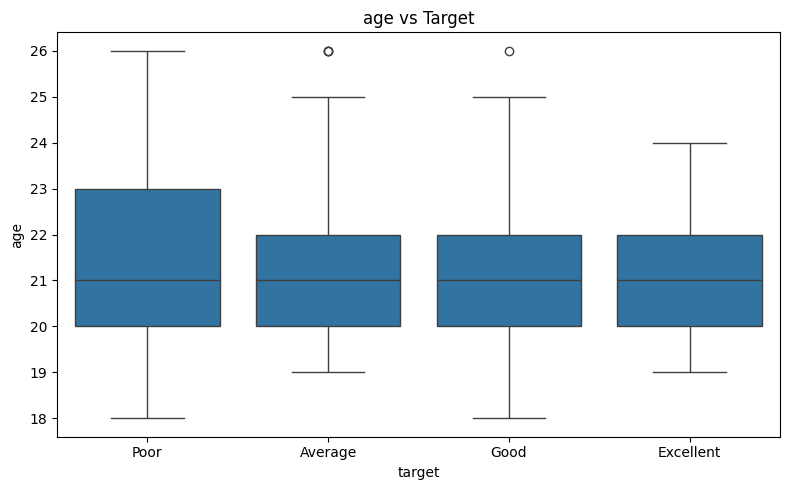

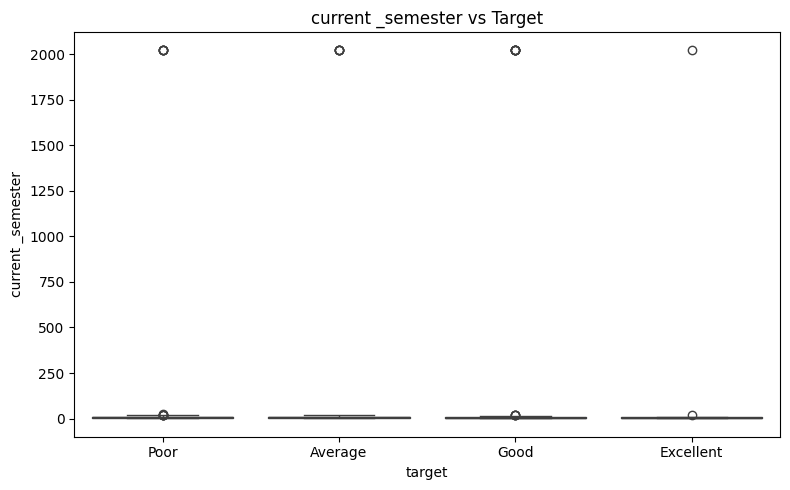

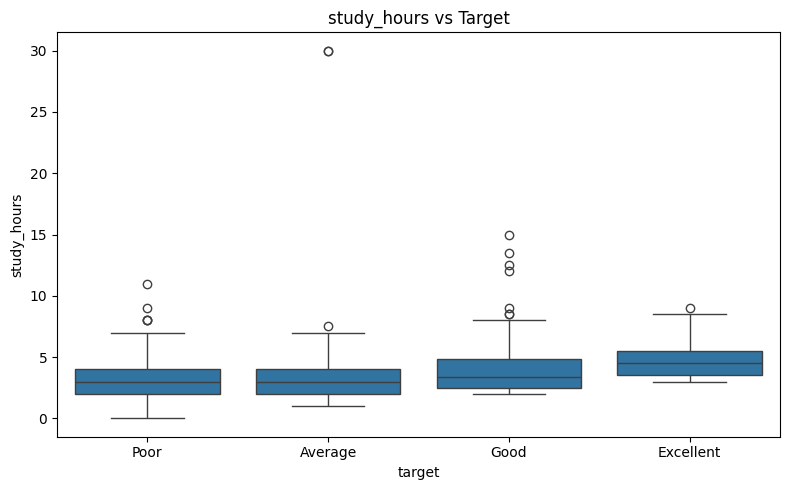

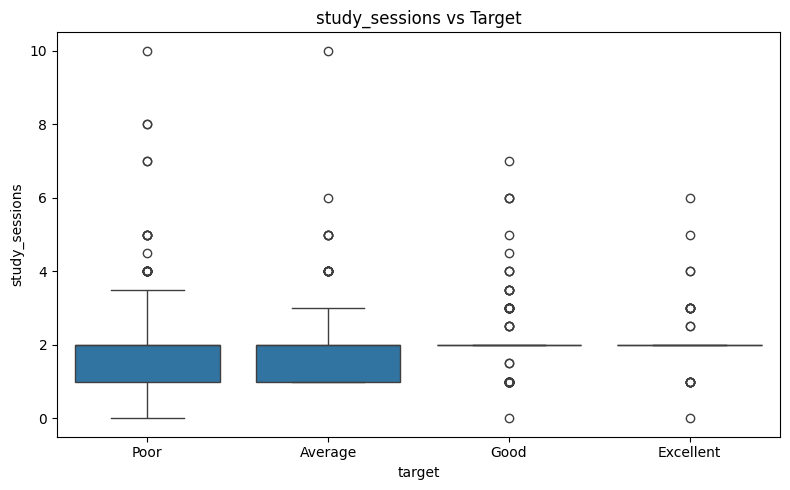

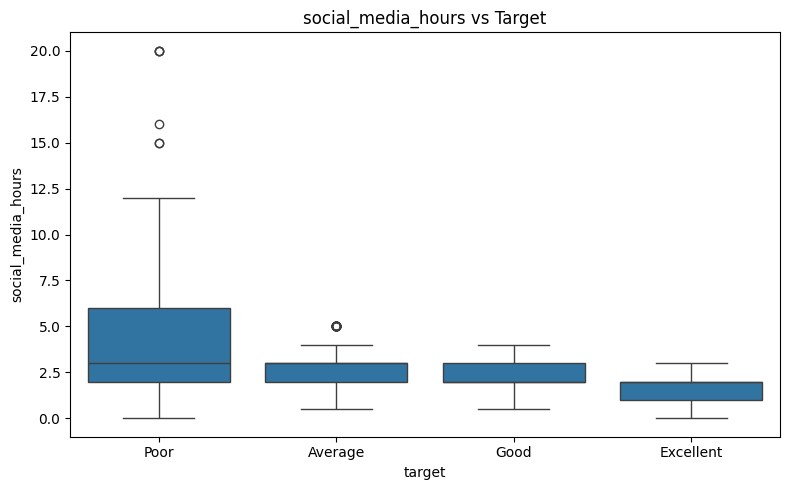

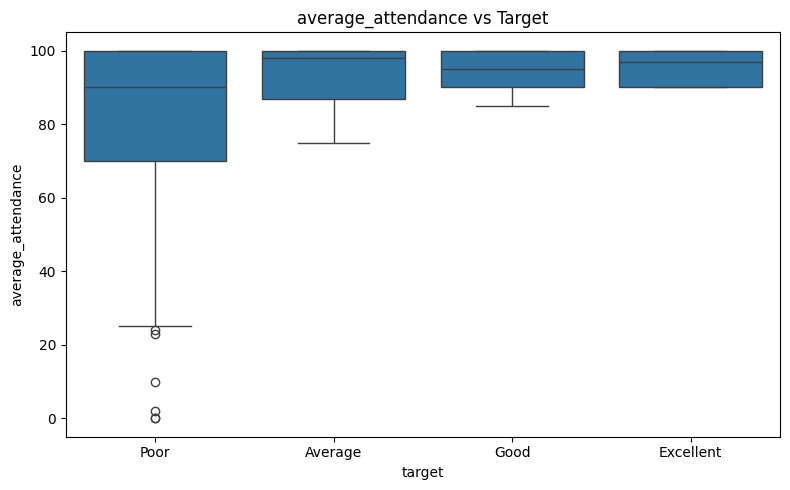

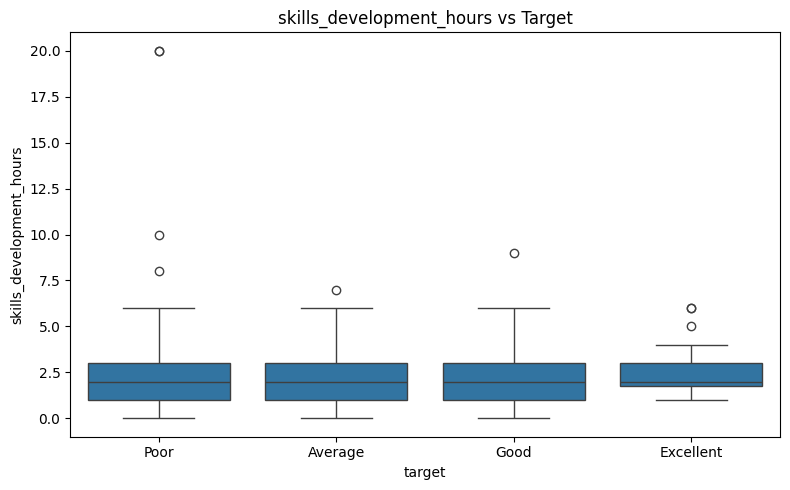

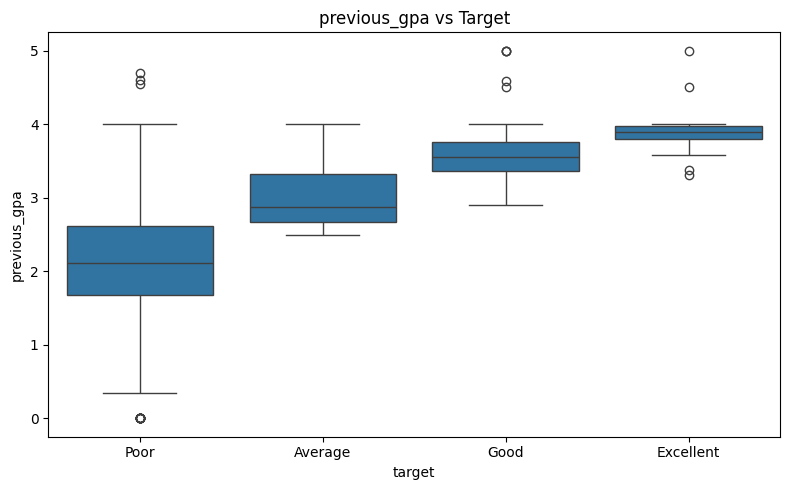

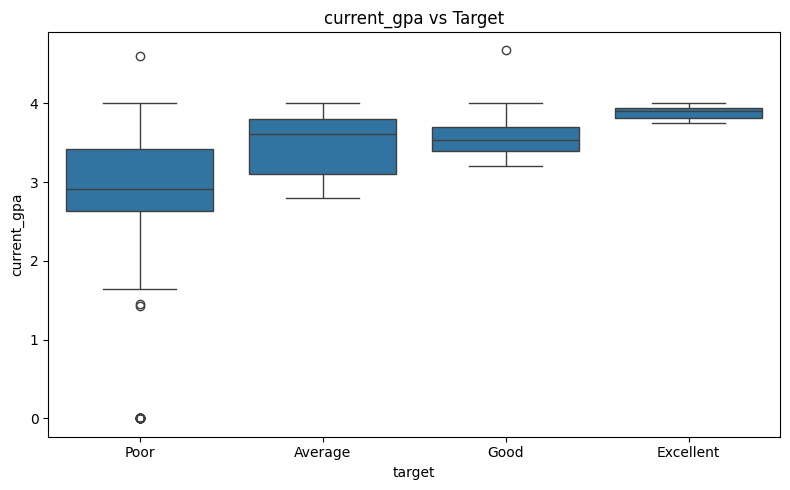

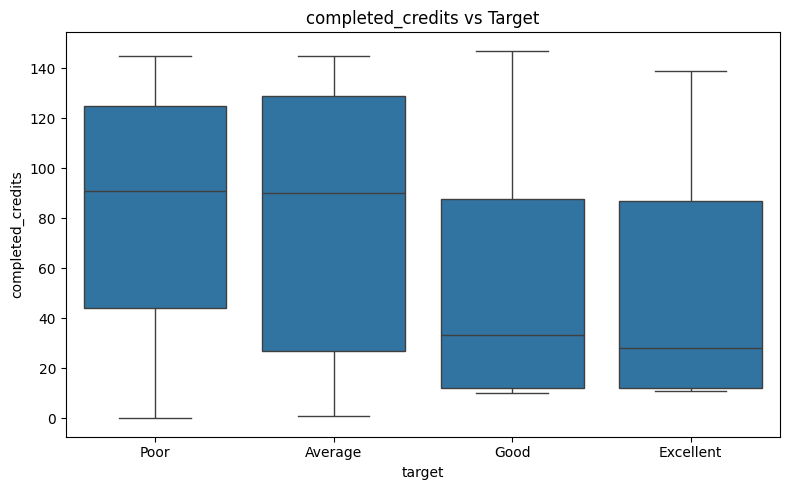

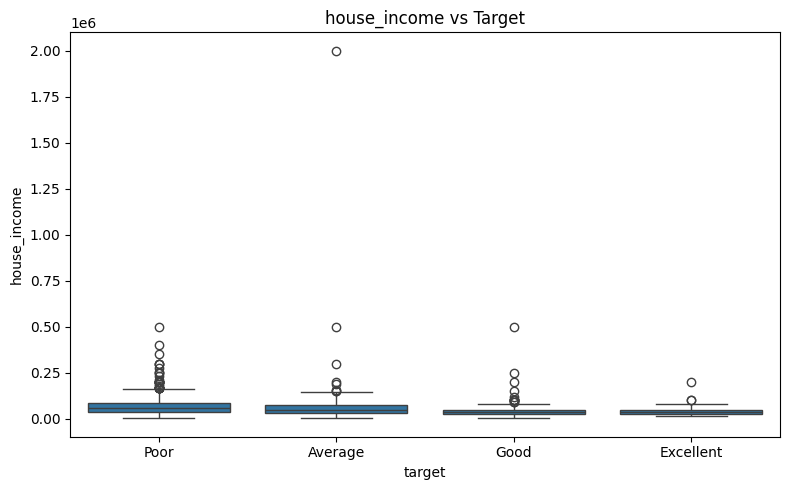

In [36]:
print(numerical_cols)

df["target"] = pd.Categorical(df["target"], categories=["Poor", "Average", "Good", "Excellent"], ordered=True)

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='target', y=col)
    plt.title(f'{col} vs Target')
    plt.tight_layout()
    plt.show()

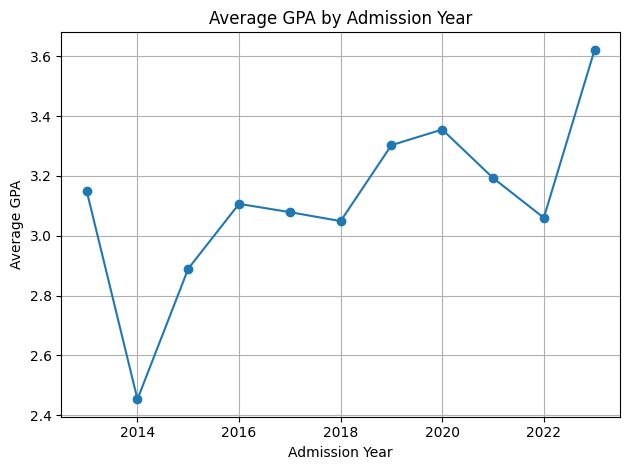

In [37]:
df['admission_year'] = pd.to_numeric(df['admission_year'], errors='coerce')
df['admission_year'] = df['admission_year'].replace(22022, 2022)  # replace the typo
df = df.dropna(subset=['admission_year'])


df['admission_year'] = df['admission_year'].astype(int)

df.groupby('admission_year')['current_gpa'].mean().plot(marker='o')
plt.title('Average GPA by Admission Year')
plt.xlabel('Admission Year')
plt.ylabel('Average GPA')
plt.grid(True)
plt.tight_layout()
plt.show()


--- Analysis for: admission_year ---
Earliest: 2013
Latest: 2023
Total unique years: 11
Years in data: <PeriodArray>
['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
 '2022', '2023']
Length: 11, dtype: period[Y-DEC]
Yearly counts:
 admission_year
2013      1
2014      3
2015      1
2016      3
2017      9
2018     38
2019    156
2020    254
2021    289
2022    249
2023      6
Freq: Y-DEC, Name: count, dtype: int64


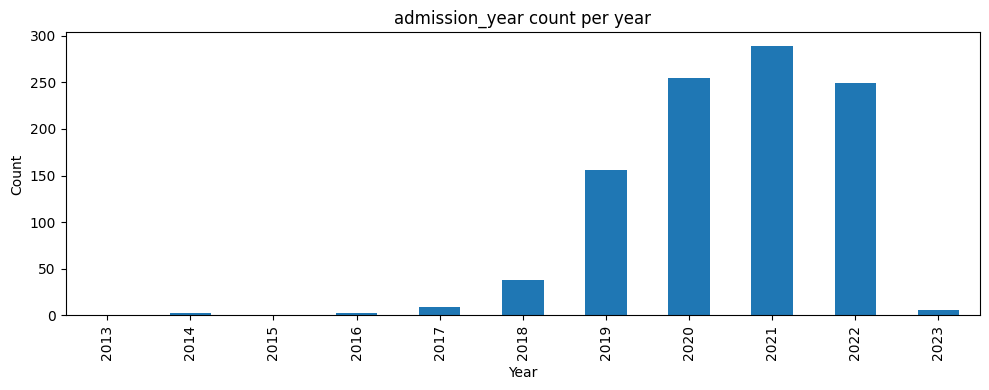


--- Analysis for: hsc_year ---
Earliest: 2012
Latest: 2028
Total unique years: 12
Years in data: <PeriodArray>
['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
 '2021', '2022', '2028']
Length: 12, dtype: period[Y-DEC]
Yearly counts:
 hsc_year
2012      1
2013      3
2014      6
2015      3
2016     24
2017     51
2018    148
2019    258
2020    401
2021    106
2022      7
2028      1
Freq: Y-DEC, Name: count, dtype: int64


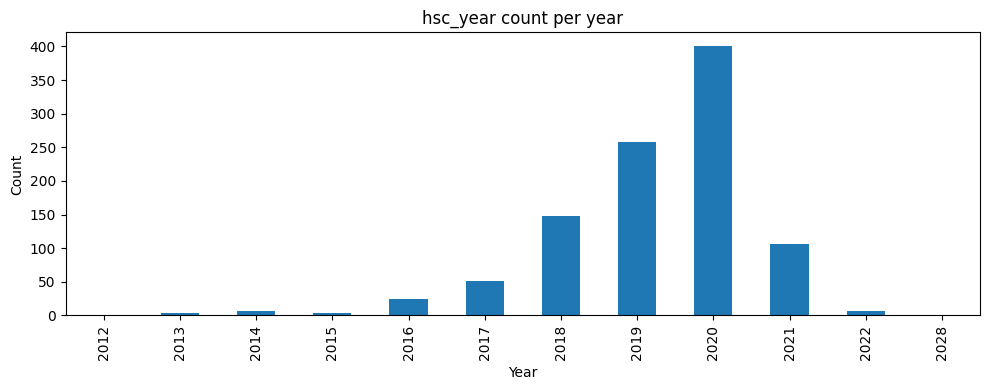

In [38]:
# Date time datas to be analysed.

date_cols = ['admission_year', 'hsc_year']

for col in date_cols:
    print(f"\n--- Analysis for: {col} ---")

    df[col] = pd.to_datetime(df[col], format='%Y', errors='coerce')

    valid_dates = df[col].dropna()
    if valid_dates.empty:
        print("No valid dates found.\n")
        continue

    print("Earliest:", valid_dates.min().year)
    print("Latest:", valid_dates.max().year)

    year_range = valid_dates.dt.to_period('Y')
    total_years = year_range.nunique()
    print("Total unique years:", total_years)

    unique_years = year_range.sort_values().unique()
    print("Years in data:", unique_years)

    yearly_counts = year_range.value_counts().sort_index()
    print("Yearly counts:\n", yearly_counts)

    # Plot
    yearly_counts.plot(kind='bar', figsize=(10, 4), title=f"{col} count per year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [39]:
feature_1_insights = """
Most numerical features are positively skewed, with extreme skewness in house_income and current_semester.
Long-tailed features (top 5 skewed) may require log transformation if included. Key data issues have been addressed.
Current_gpa and previous_gpa show strong alignment with the target, while others warrant further analysis.

"""

In [40]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.5 Explore Feature of Interest - Categorical Datatype Features

> You can add more cells in this section

--- gender ---
Unique: 2
Top values:
 gender
Male      557
Female    452
Name: count, dtype: int64
Missing: 0


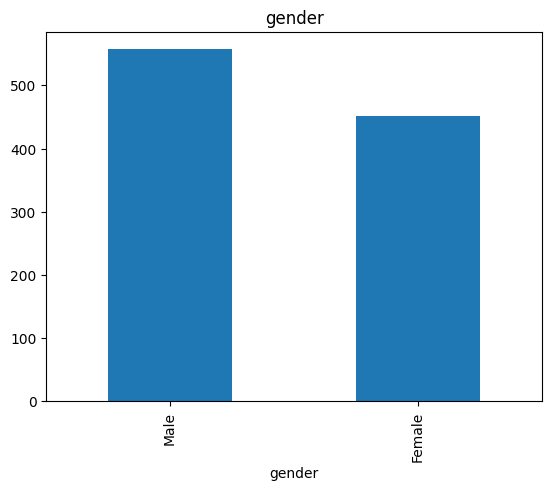

--- birth_country ---
Unique: 10
Top values:
 birth_country
AU    882
PH     38
IN     37
NZ     20
ZA     10
US      7
TH      5
IE      4
CA      3
BR      3
Name: count, dtype: int64
Missing: 0


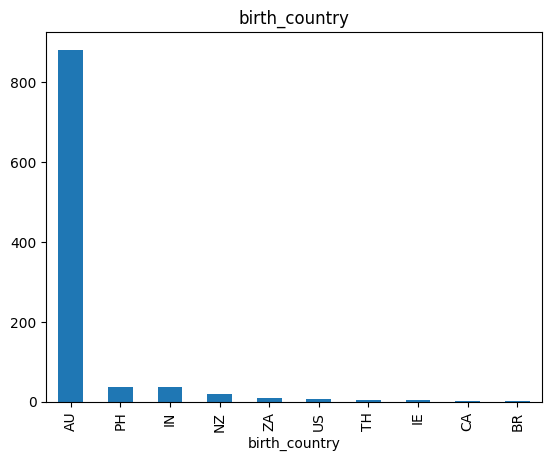

--- street_suffix ---
Unique: 200
Top values:
 street_suffix
Terrace       13
Track         12
Mews          12
Garden        10
Esplanade     10
              ..
Key            1
River          1
Cul-de-sac     1
Expressway     1
Court          1
Name: count, Length: 200, dtype: int64
Missing: 0


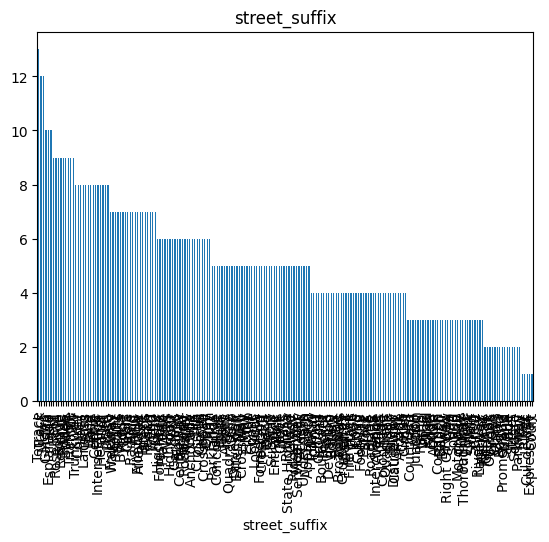

--- city ---
Unique: 985
Top values:
 city
Johnsonmouth        3
Kimberlyberg        3
Hicksshire          2
New Victoria        2
New Mary            2
                   ..
Middletonfurt       1
West Tiffanytown    1
Dawnville           1
West Heather        1
New Angelberg       1
Name: count, Length: 985, dtype: int64
Missing: 0


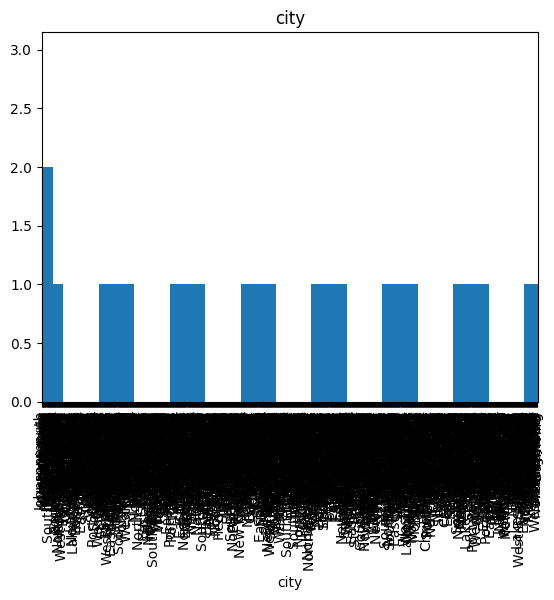

--- state_abbr ---
Unique: 8
Top values:
 state_abbr
WA     145
NT     136
NSW    131
ACT    130
VIC    121
SA     120
TAS    116
QLD    110
Name: count, dtype: int64
Missing: 0


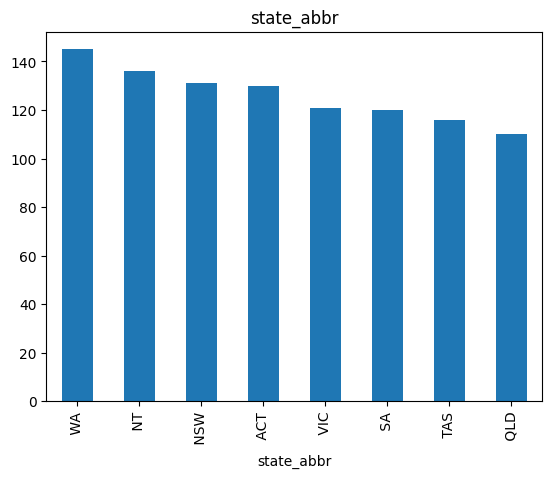

--- program ---
Unique: 1
Top values:
 program
BCSE    1009
Name: count, dtype: int64
Missing: 0


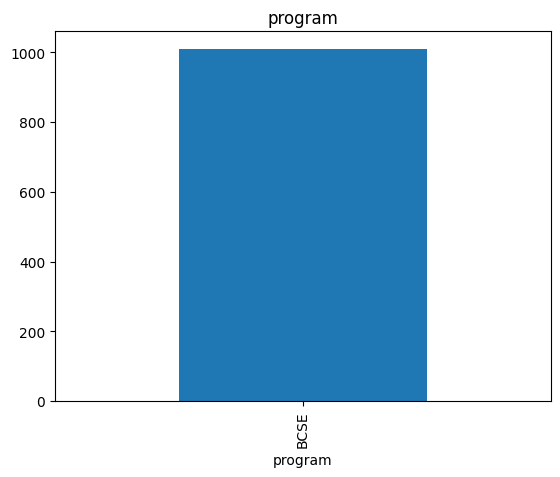

--- scholarship ---
Unique: 2
Top values:
 scholarship
No     589
Yes    420
Name: count, dtype: int64
Missing: 0


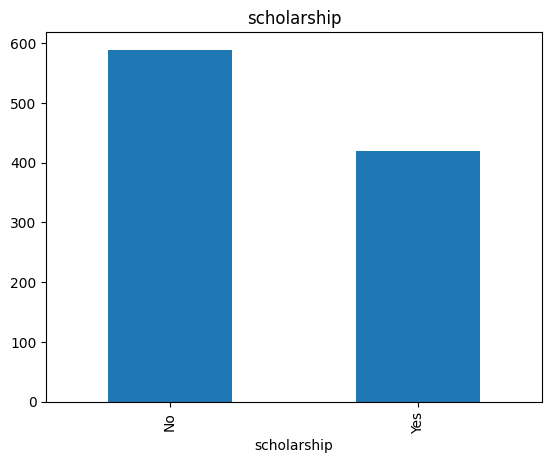

--- university_transport ---
Unique: 2
Top values:
 university_transport
No     607
Yes    402
Name: count, dtype: int64
Missing: 0


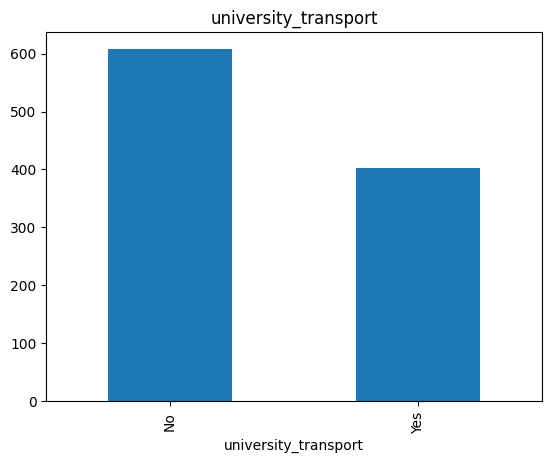

--- learning_mode ---
Unique: 2
Top values:
 learning_mode
Offline    734
Online     275
Name: count, dtype: int64
Missing: 0


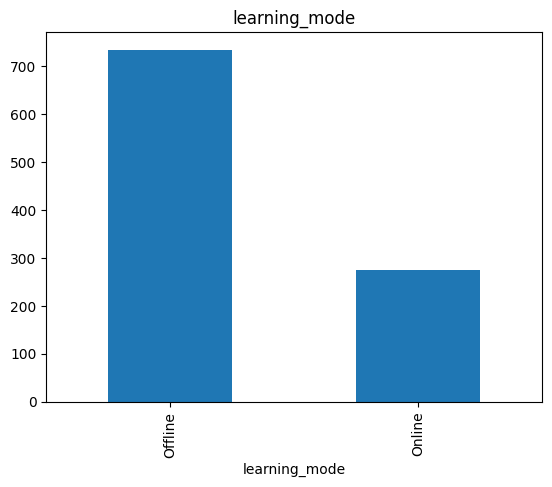

--- has_phone ---
Unique: 2
Top values:
 has_phone
Yes    999
No      10
Name: count, dtype: int64
Missing: 0


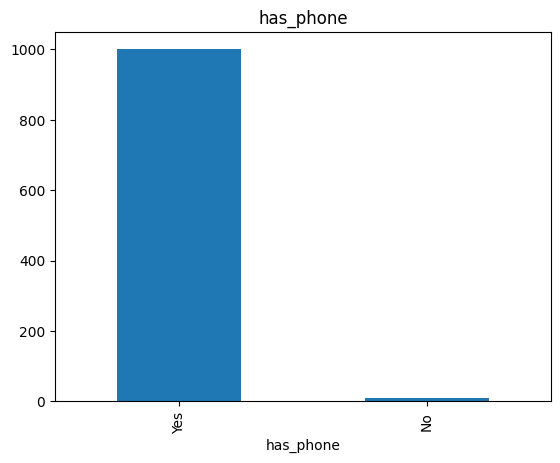

--- has_laptop ---
Unique: 2
Top values:
 has_laptop
Yes    924
No      85
Name: count, dtype: int64
Missing: 0


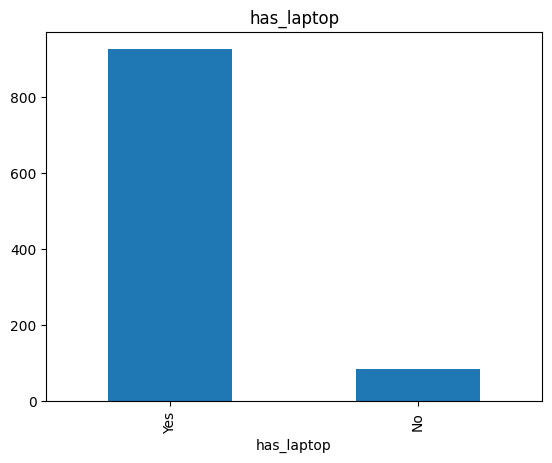

--- english_proficiency ---
Unique: 3
Top values:
 english_proficiency
Intermediate    561
Basic           244
Advance         204
Name: count, dtype: int64
Missing: 0


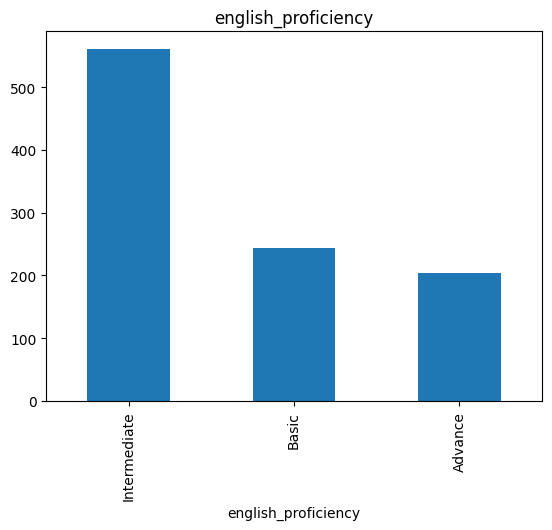

--- on_probation ---
Unique: 2
Top values:
 on_probation
No     748
Yes    261
Name: count, dtype: int64
Missing: 0


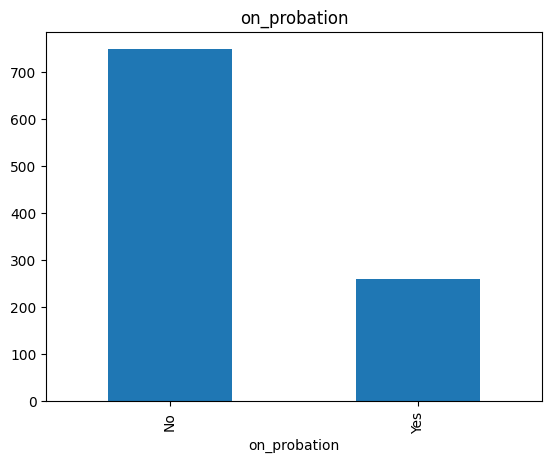

--- is_suspended ---
Unique: 2
Top values:
 is_suspended
No     974
Yes     35
Name: count, dtype: int64
Missing: 0


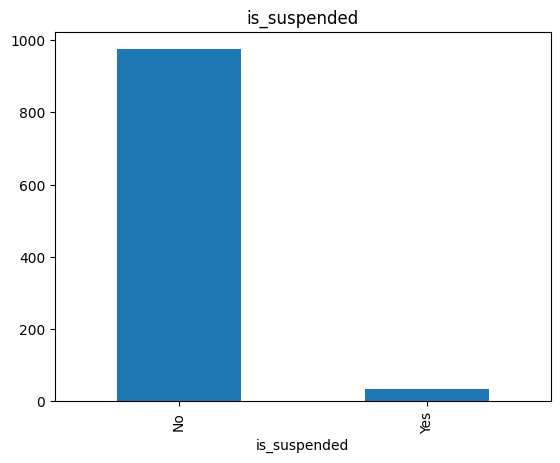

--- has_consulted_teacher ---
Unique: 2
Top values:
 has_consulted_teacher
Yes    532
No     477
Name: count, dtype: int64
Missing: 0


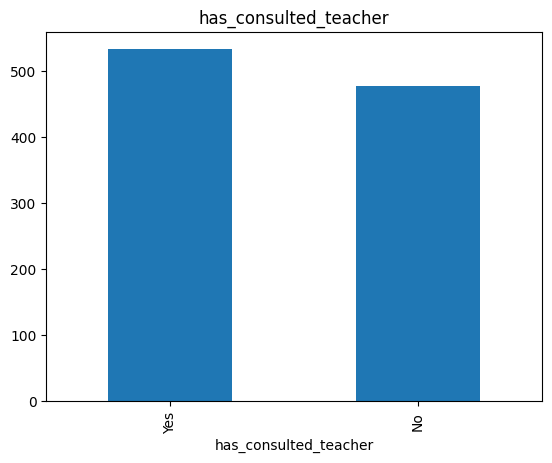

--- relationship ---
Unique: 4
Top values:
 relationship
Single               730
In a relationship    176
Married               90
Engaged               13
Name: count, dtype: int64
Missing: 0


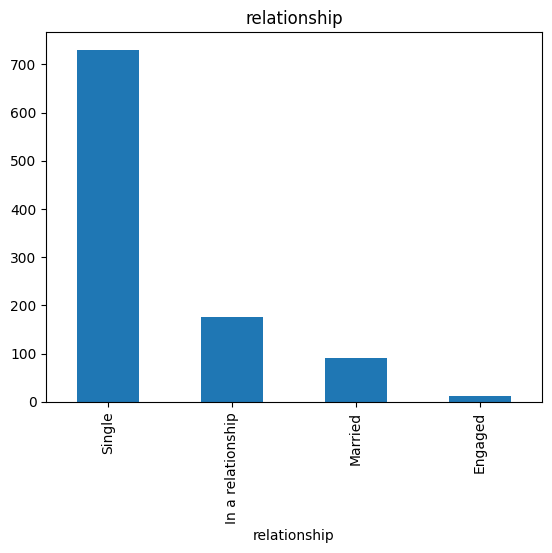

--- co_curricular ---
Unique: 2
Top values:
 co_curricular
No     578
Yes    431
Name: count, dtype: int64
Missing: 0


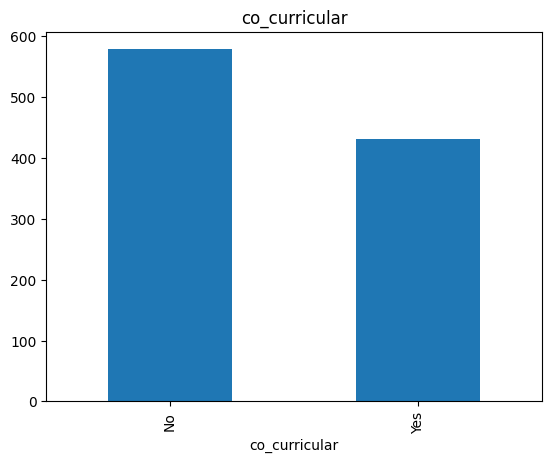

--- living_arrangement ---
Unique: 2
Top values:
 living_arrangement
Family      542
Bachelor    467
Name: count, dtype: int64
Missing: 0


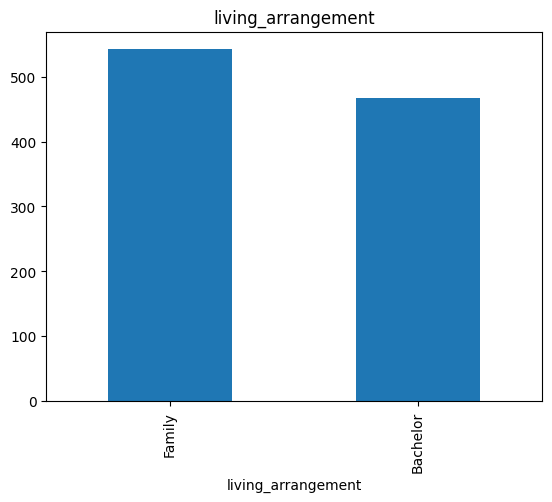

--- health_issues ---
Unique: 2
Top values:
 health_issues
No     830
Yes    179
Name: count, dtype: int64
Missing: 0


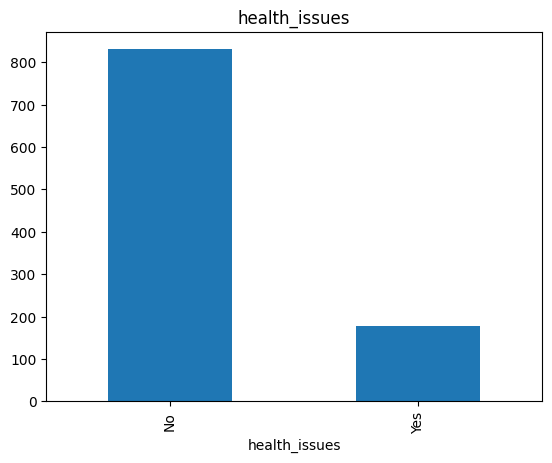

--- disabilities ---
Unique: 2
Top values:
 disabilities
No     988
Yes     21
Name: count, dtype: int64
Missing: 0


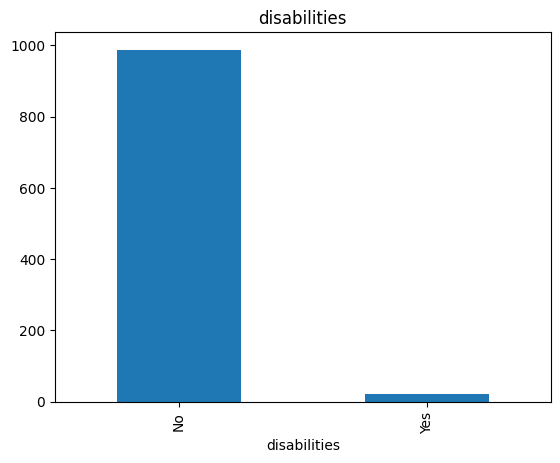

--- target ---
Unique: 4
Top values:
 target
Poor         503
Average      272
Good         178
Excellent     56
Name: count, dtype: int64
Missing: 0


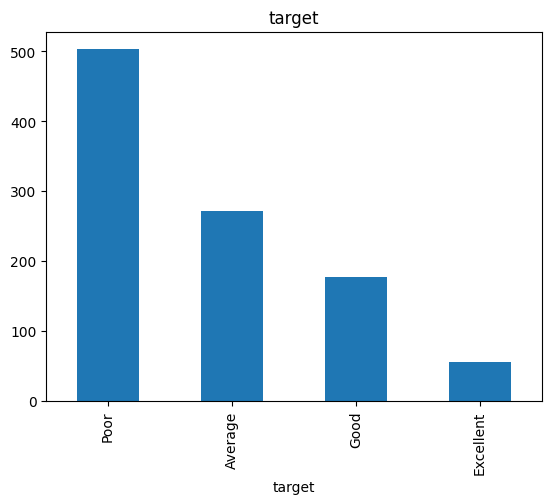

--- skills ---
Unique: 68
Top values:
 skills
Programming                        380
Networking                         135
Cyber security                      79
Programming, Web development        68
Web development skill(Frontend)     61
                                  ... 
learning python                      1
Problem solving                      1
Learning frontend                    1
Networking, Graphics Design          1
Programming, Game development        1
Name: count, Length: 68, dtype: int64
Missing: 1


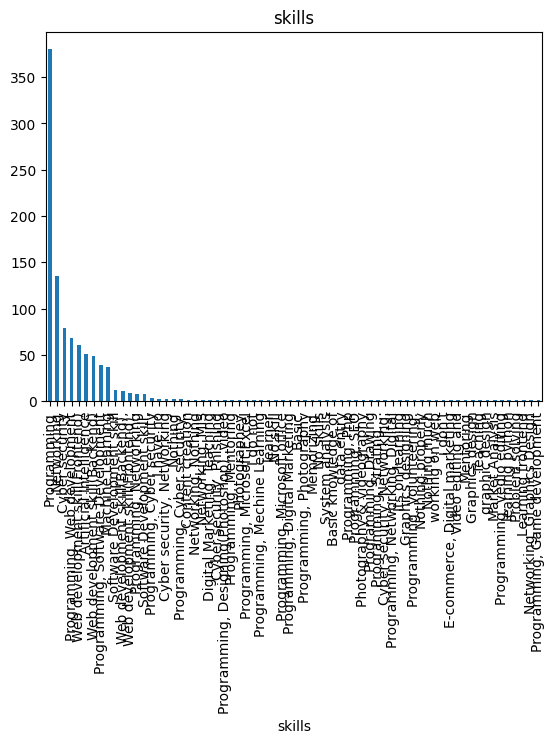

--- area_of_interest ---
Unique: 20
Top values:
 area_of_interest
Software                                     296
Data Science                                 236
Hardware                                     143
Networking                                    98
UI/UX                                         88
Machine Learning / Deep Learning              65
Artificial Intelligence                       54
Web Development                                5
Software, Hardware                             5
Cyber Security                                 2
Hardware, Physics                              1
Creating a game using a program language       1
Software, App                                  1
Software, BCS                                  1
confuse                                        1
Web developing                                 1
Software, Blockchain Engineering               1
Teaching                                       1
Cybersecurity                                  1
Com

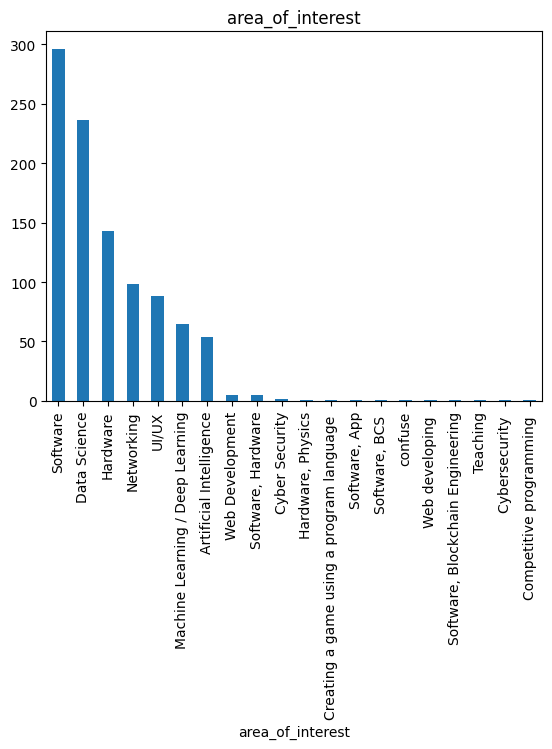

--- has_diploma ---
Unique: 2
Top values:
 has_diploma
False    992
True      17
Name: count, dtype: int64
Missing: 0


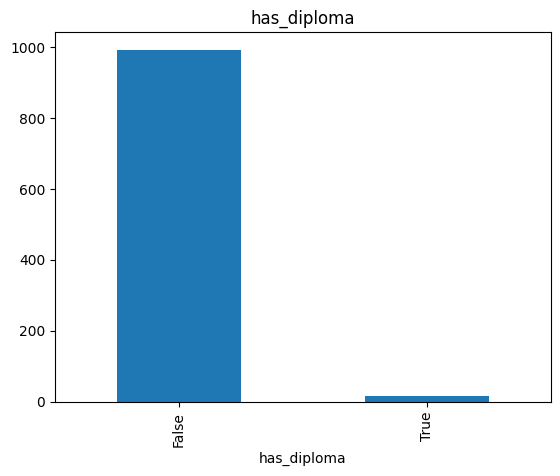

--- postcode ---
Unique: 609
Top values:
 postcode
2619    31
2920    26
2914     8
2677     7
2907     7
        ..
2971     1
2177     1
2523     1
2447     1
3048     1
Name: count, Length: 609, dtype: int64
Missing: 0


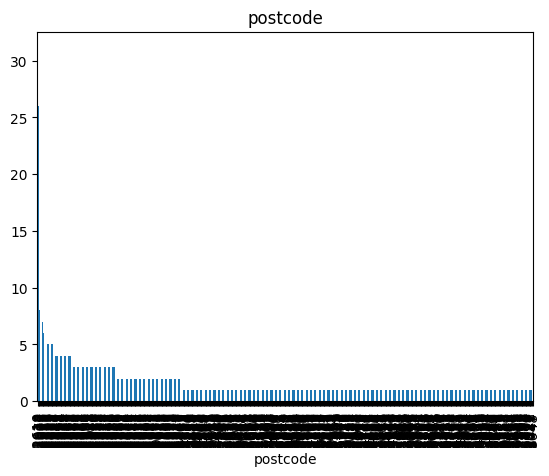

In [41]:
#Analysing selected significant_features

cat_cols = df.select_dtypes(exclude='number').columns.tolist()
cat_cols.append('postcode')  # Manually adding postcode as it's categorical
cat_cols = [col for col in cat_cols if col not in ['admission_year', 'hsc_year']]  # Removing datetime columns

for col in cat_cols:
    print(f'--- {col} ---')
    print("Unique:", df[col].nunique())
    print("Top values:\n", df[col].value_counts())
    print("Missing:", df[col].isnull().sum())
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()


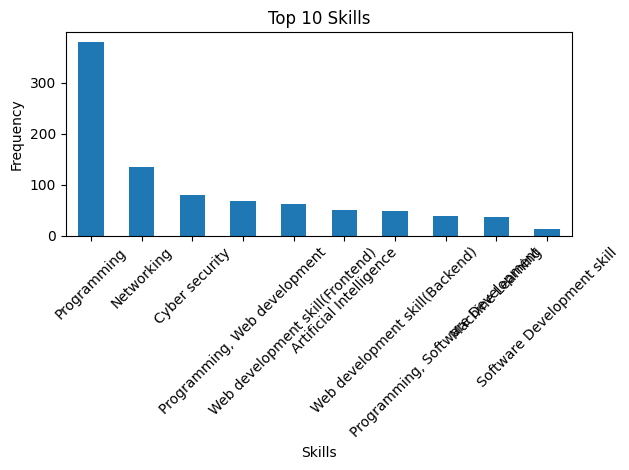

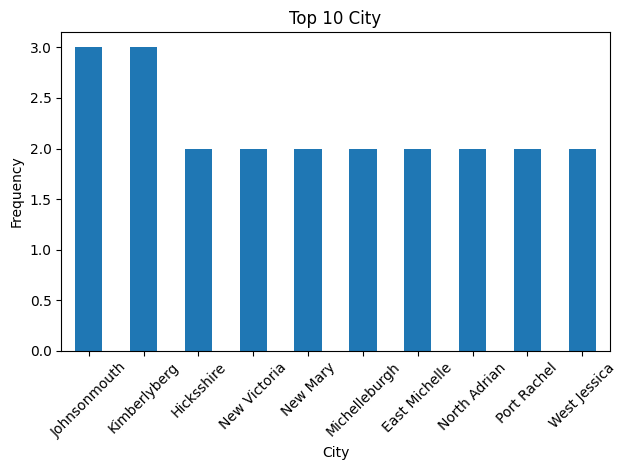

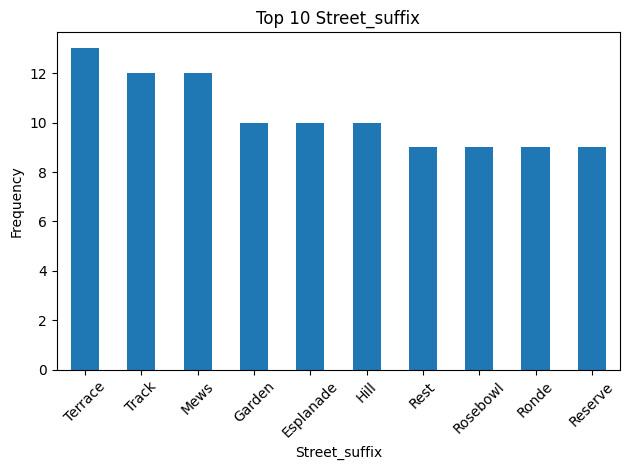

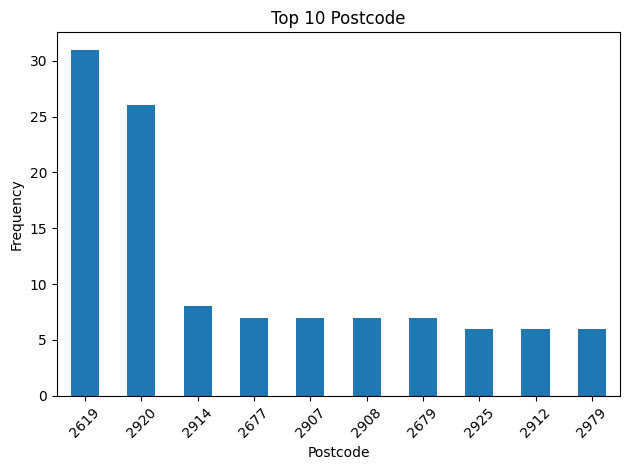

In [42]:
for col in ['skills', 'city', 'street_suffix', 'postcode']:
    top_values = df[col].value_counts().nlargest(10)
    top_values.plot(kind='bar', title=f'Top 10 {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


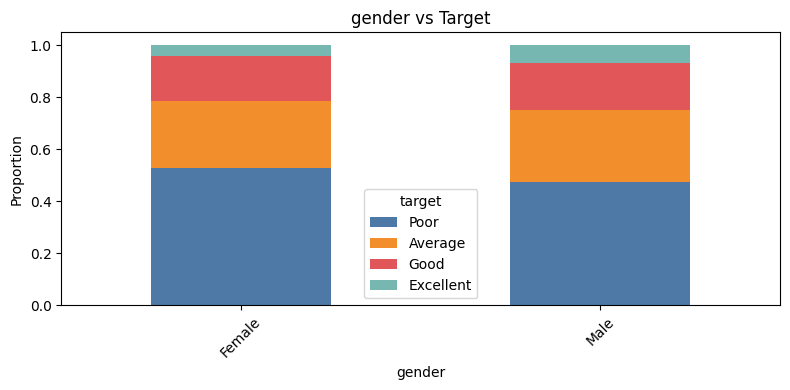

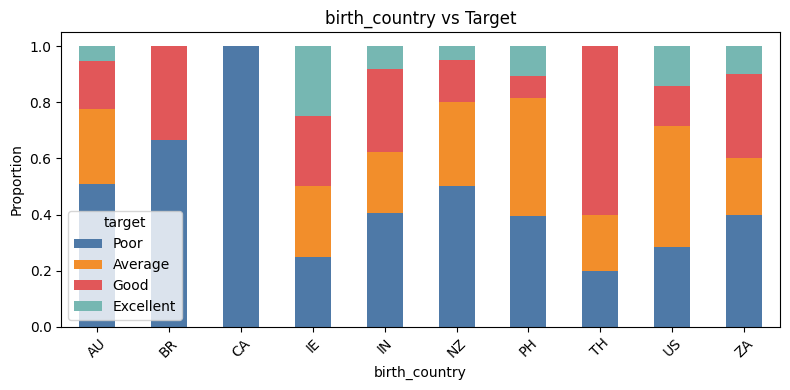

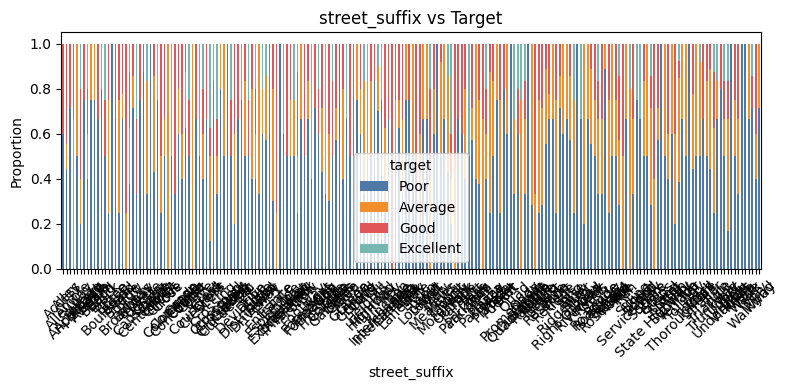

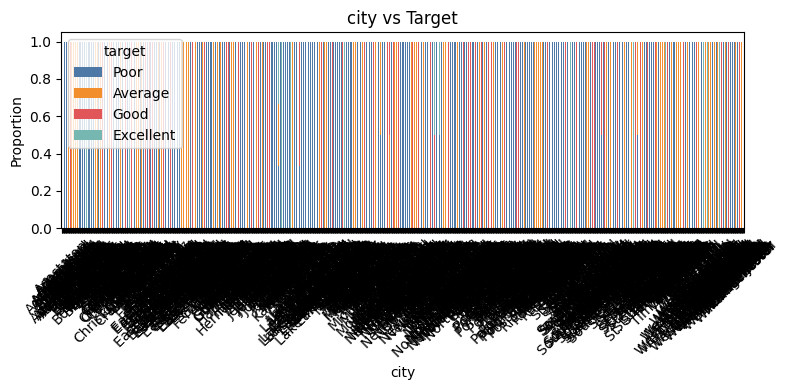

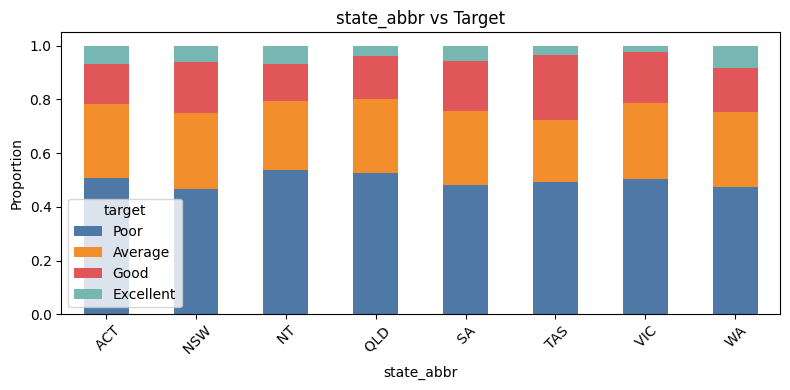

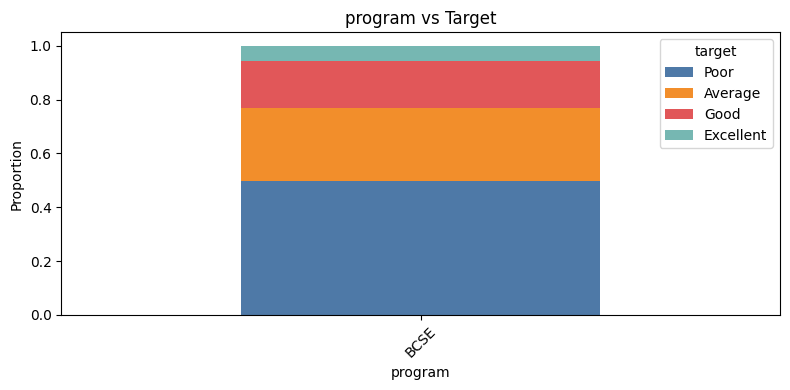

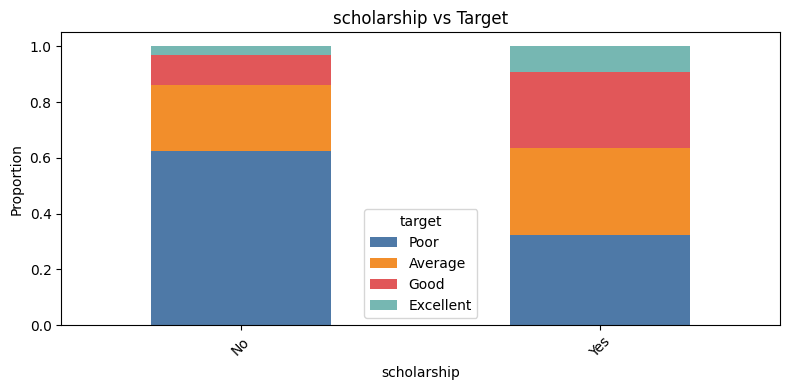

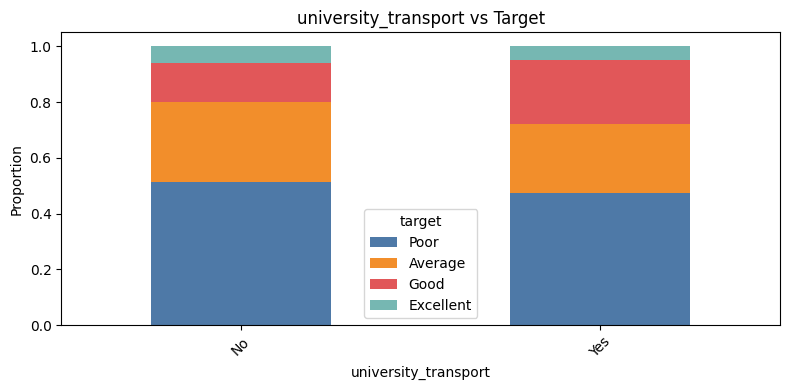

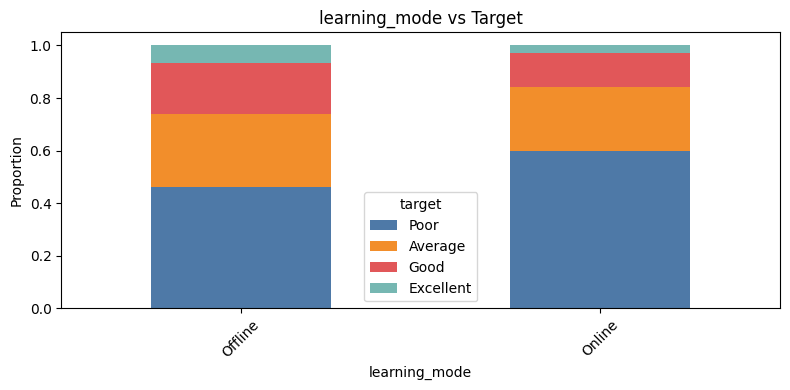

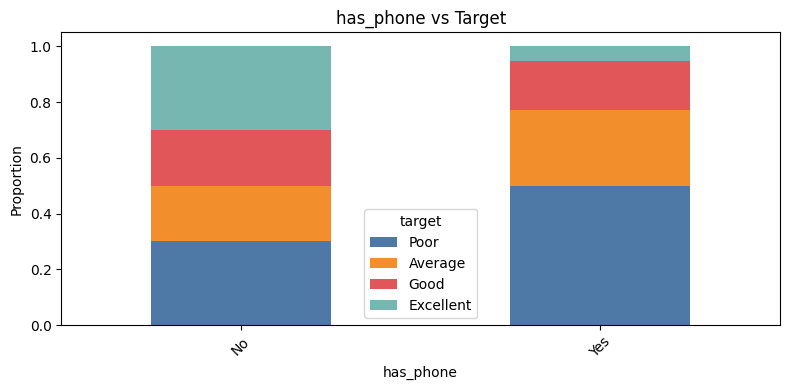

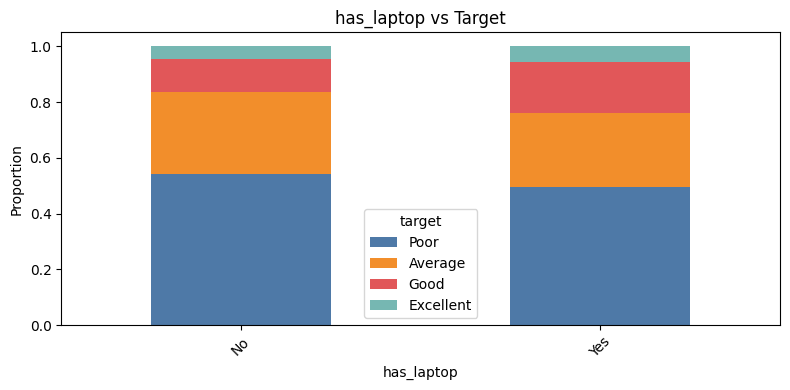

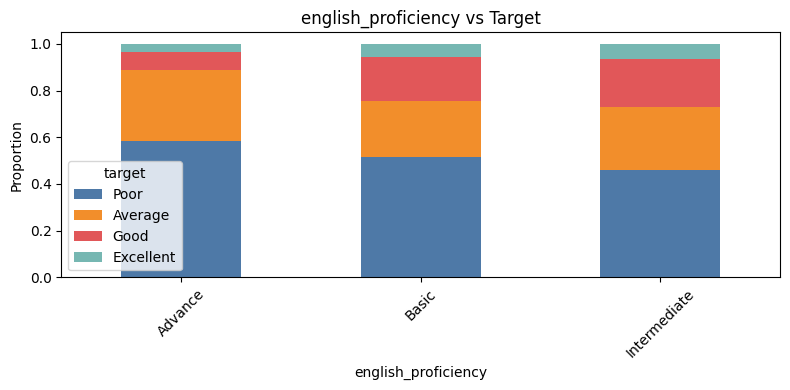

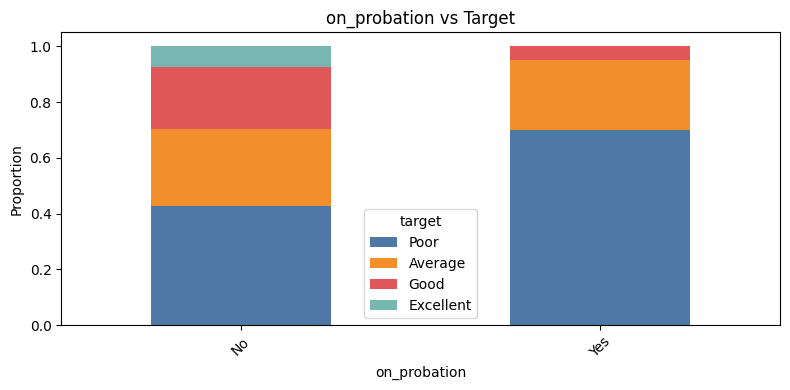

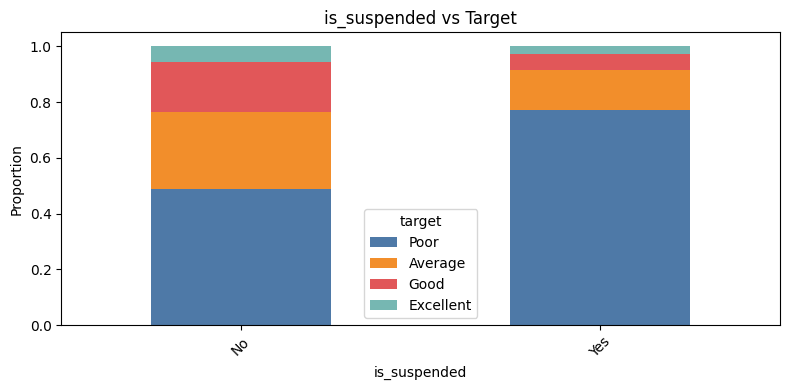

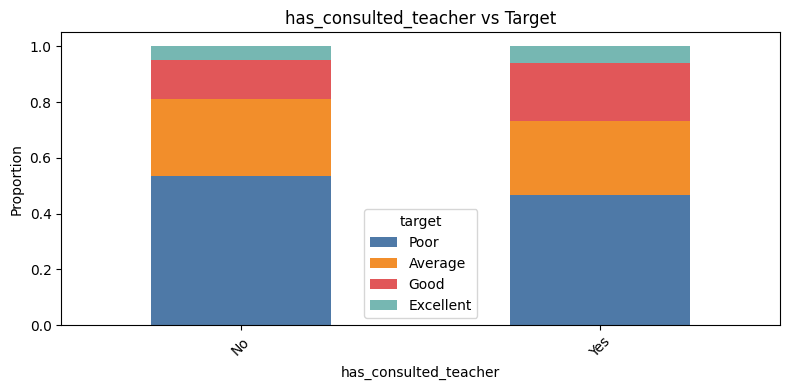

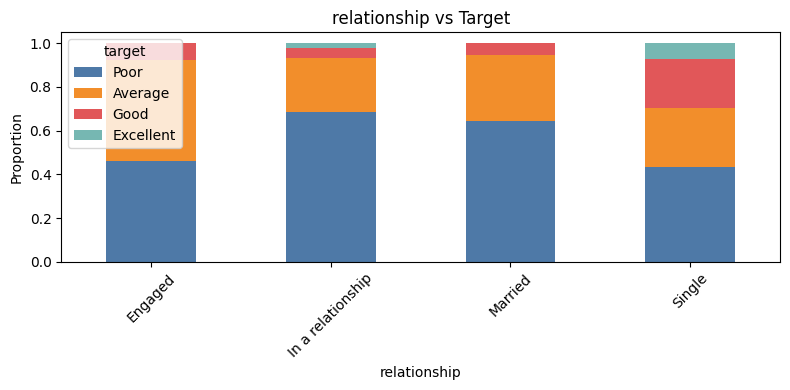

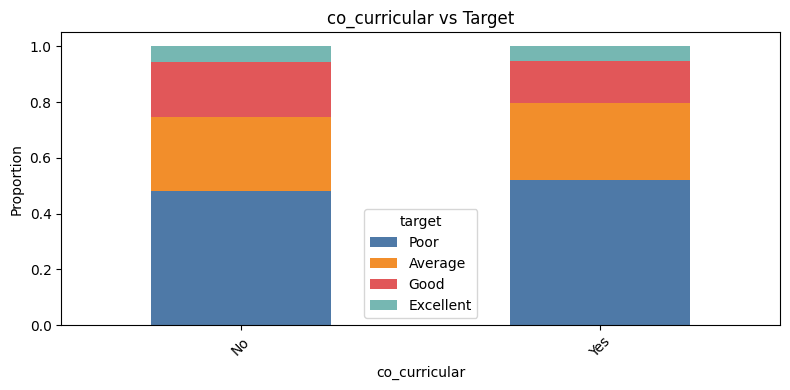

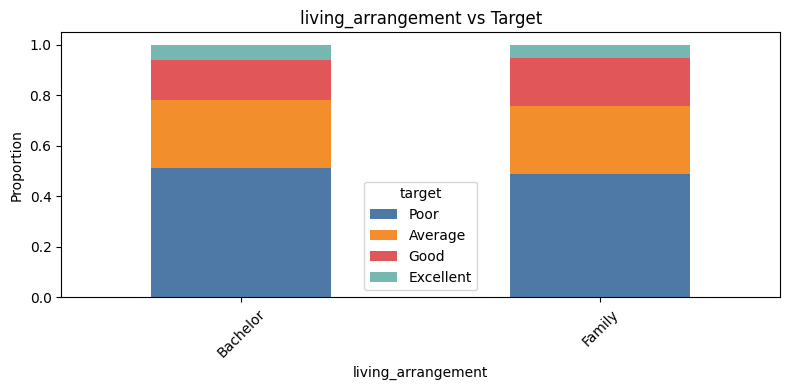

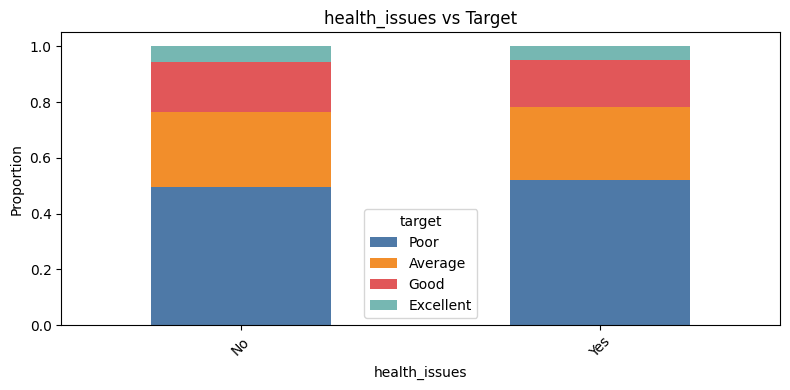

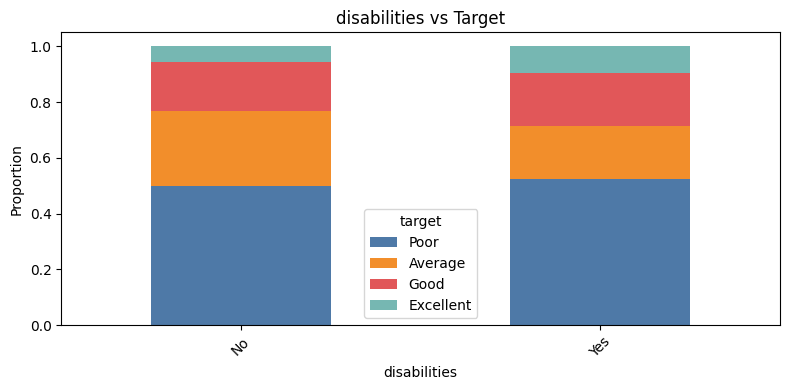

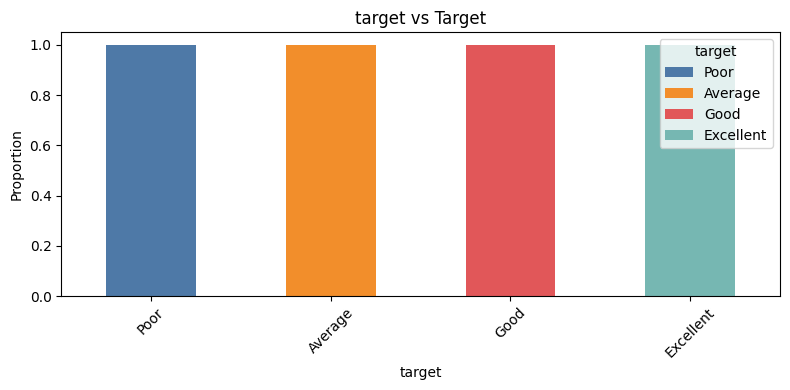

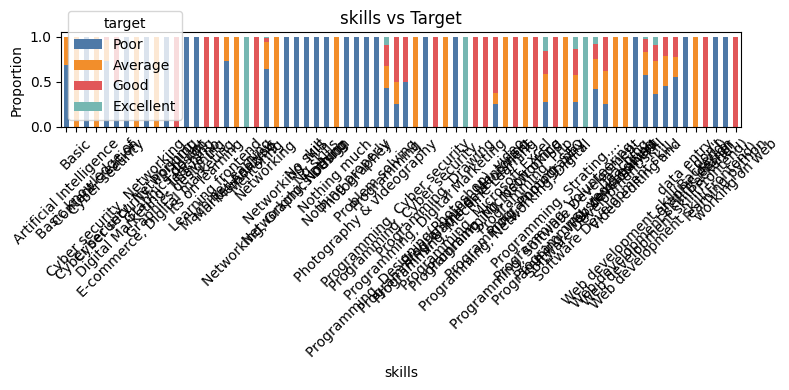

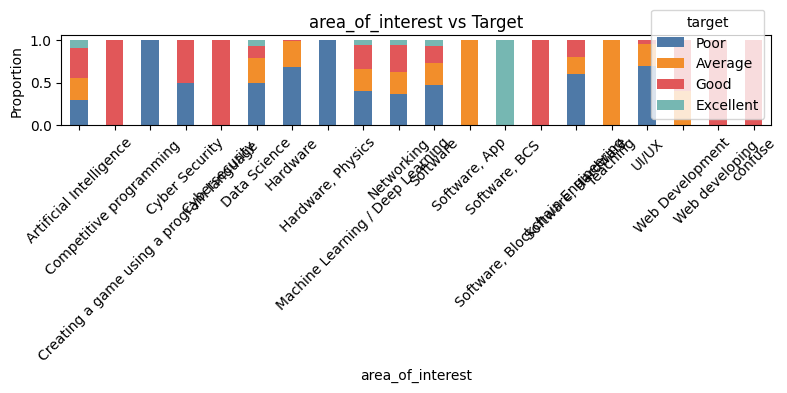

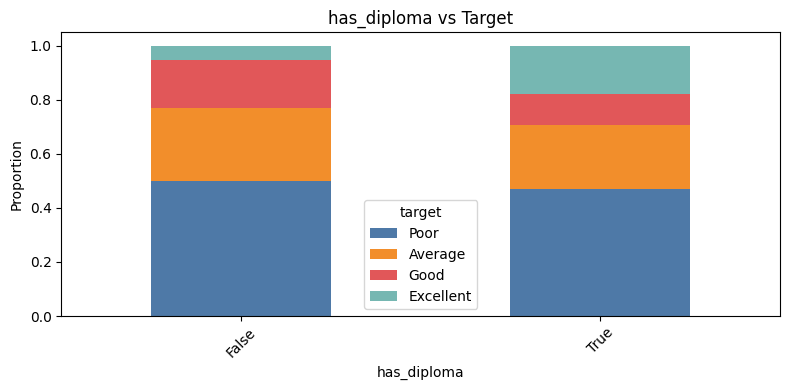

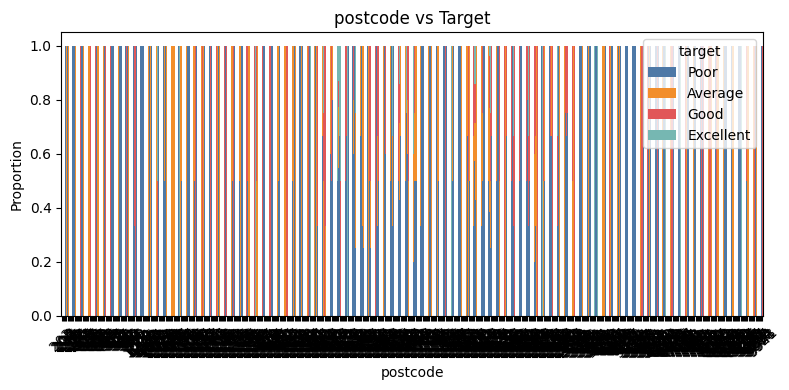

In [43]:
#To show relationship between Target and categorical data set

target_order = ['Poor', 'Average', 'Good', 'Excellent']
df['target'] = pd.Categorical(df['target'], categories=target_order, ordered=True)

colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']

for col in cat_cols:
    pd.crosstab(df[col], df['target'], normalize='index').plot(
        kind='bar', stacked=True, color=colors, figsize=(8, 4)
    )
    plt.title(f'{col} vs Target')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [44]:
# <Student to fill this section>
feature_2_insights = """
Categorical feature analysis focused on unique values, category dominance, and their relationship with the target.
While features like has_phone, has_laptop, birth_country, is_suspended, and disabilities are heavily skewed and may be removed,
is_suspended shows a clear link to performance, and disabilities does not. Both require careful consideration due to potential ethical and bias implications.
"""

In [45]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest Boolean Feature

> You can add more cells in this section

--- has_diploma ---
Unique: 2
Top values:
 has_diploma
False    992
True      17
Name: count, dtype: int64
Missing: 0


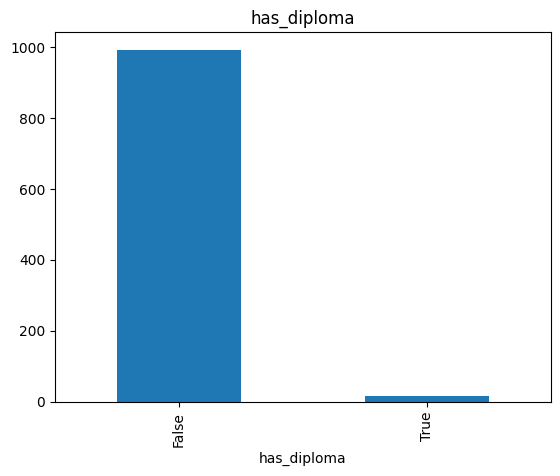

In [46]:
for col in ['has_diploma']:
    print(f'--- {col} ---')
    print("Unique:", df[col].nunique())
    print("Top values:\n", df[col].value_counts())
    print("Missing:", df[col].isnull().sum())
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

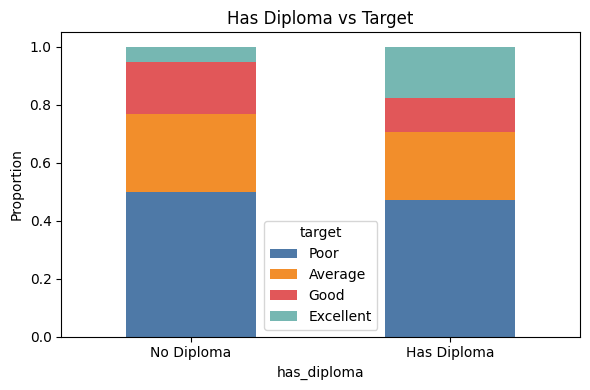

In [47]:
pd.crosstab(df['has_diploma'], df['target'], normalize='index').plot(
    kind='bar', stacked=True, color=colors, figsize=(6, 4)
)
plt.title('Has Diploma vs Target')
plt.ylabel('Proportion')
plt.xticks(ticks=[0,1], labels=['No Diploma', 'Has Diploma'], rotation=0)
plt.tight_layout()
plt.show()


In [48]:

feature_3_insights = """
The only boolean feature, has_diploma, was separated to simplify data processing, encoding, and interpretation.
It is heavily skewed toward False and shows no clear relationship with the target, suggesting limited predictive value.
"""

In [49]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

---
## D. Feature Selection


### D.1 Approach  - Correlation among Numerical features


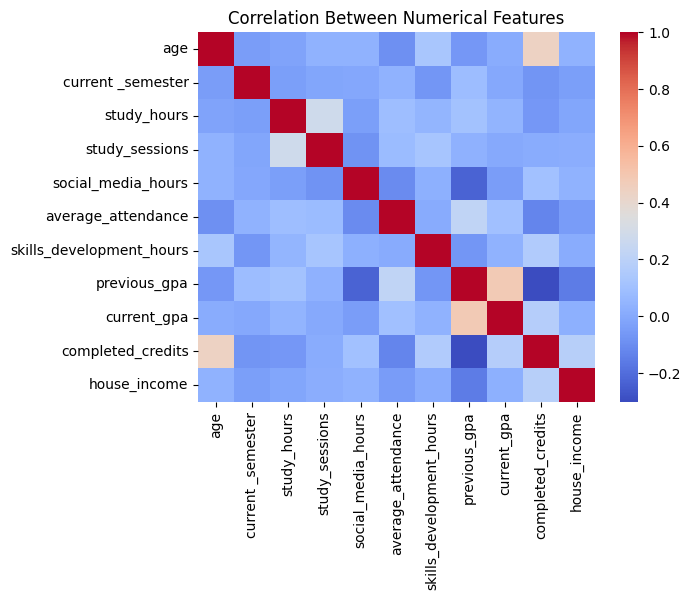

In [50]:
# Heatmap among Numerical features

corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

In [51]:
#Display top 5 correlation
corr_matrix = df.corr(numeric_only=True)

top_corr = (
    corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
    .unstack()
    .dropna()
    .abs()
    .sort_values(ascending=False)
    .drop_duplicates()
)

print("Top 5 Correlated Feature Pairs:")
print(top_corr.head(5))

Top 5 Correlated Feature Pairs:
previous_gpa        current_gpa          0.486123
age                 completed_credits    0.435914
previous_gpa        completed_credits    0.301494
study_hours         study_sessions       0.278635
social_media_hours  previous_gpa         0.231522
dtype: float64


In [52]:
# <Student to fill this section>
feature_selection_1_insights = """
The heatmap did not reveal any strong multicollinearity, with the top five correlated feature pairs showing only moderate relationships — the highest being around 0.48 — indicating minimal risk of redundancy among numerical features.
This analysis was used to assess potential multicollinearity and to identify any highly correlated features that could be combined or transformed during feature engineering.
"""

In [53]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach - ANNOVA Test - Numeric features VS Categorical target


In [54]:
# Calculating ANOVA
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(['postcode'], errors='ignore')  # Postcode is categorical

results = []

for col in numerical_cols:
    groups = [df[df['target'] == val][col].dropna().values for val in df['target'].unique()]

    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        results.append((col, p_val))

# Sort by p-value (ascending)
sorted_numericals = sorted(results, key=lambda x: x[1])

# Filter features with p-value < 0.05
significant_features = [(feature, p) for feature, p in sorted_numericals if p < 0.05]

# Print results
print('Features with p-value < 0.05 (statistically significant):')
for feature, p_value in significant_features:
    print(f'{feature}: p-value = {p_value:.5f}')

Features with p-value < 0.05 (statistically significant):
previous_gpa: p-value = 0.00000
current_gpa: p-value = 0.00000
social_media_hours: p-value = 0.00000
average_attendance: p-value = 0.00000
completed_credits: p-value = 0.00000
study_hours: p-value = 0.00000
house_income: p-value = 0.00008
age: p-value = 0.00340


In [55]:
# Date type data set
X_years = df[['admission_year', 'hsc_year']]
y = df['target']

y_encoded = LabelEncoder().fit_transform(y)

# Run ANOVA
f_values, p_values = f_classif(X_years, y_encoded)

for feature, f, p in zip(X_years.columns, f_values, p_values):
    print(f"{feature}: F-value = {f:.2f}, p-value = {p:.5f}")


admission_year: F-value = 2.35, p-value = 0.07080
hsc_year: F-value = 1.62, p-value = 0.18412


Note : Since date-type features weren't initially captured in numerical or categorical analysis, they were assessed separately using ANOVA and found to be statistically insignificant for predicting the target.

In [56]:
# <Student to fill this section>
feature_selection_2_insights = """

ANOVA tests whether the mean of a numerical feature varies across categories of the target.

Null Hypothesis (H₀): The means of the numerical feature are equal across all target categories.
Alternative Hypothesis (H₁): At least one target category has a significantly different mean.

If the p-value is below 0.05, we reject the null hypothesis — indicating that the feature varies across target classes and may be useful for classification. Based on the p-values,
we were able to narrow down features as shown above for modeling.


"""

In [57]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.3 Approach  - Chi Square Test - Categorical features VS Categorical target




> You can add more cells related to other approaches in this section

In [58]:
# Analysing categorical data sets
cat_cols = df.select_dtypes(include='object').columns

cat_cols = df.select_dtypes(exclude='number').columns.tolist()
cat_cols.append('postcode')  #Manually adding postcode

target = 'target'

chi2_results = []

for col in cat_cols:
    if col != target:
        contingency = pd.crosstab(df[col], df[target])
        chi2, p, dof, expected = chi2_contingency(contingency)
        if p < 0.05:
            chi2_results.append({'Feature': col, 'P-Value': p})

significant_features = pd.DataFrame(chi2_results).sort_values(by='P-Value', ascending=True)

print(significant_features)

                  Feature       P-Value
1             scholarship  2.913443e-22
6            on_probation  1.801695e-17
9            relationship  5.919795e-12
11       area_of_interest  1.897247e-11
10                 skills  4.437571e-08
0                hsc_year  7.110040e-05
3           learning_mode  3.185520e-04
5     english_proficiency  8.045934e-04
2    university_transport  4.868024e-03
4               has_phone  7.767747e-03
7            is_suspended  1.186534e-02
8   has_consulted_teacher  2.317679e-02


In [59]:
feature_selection_3_insights = """
The Chi-Square test was used to evaluate whether the distribution of categories (i.e., their frequencies) differed significantly across target classes.

Null Hypothesis (H₀): The feature is independent of the target — category frequencies are similar across all target groups.
Alternative Hypothesis (H₁): The feature is associated with the target — at least one category has a significantly different frequency across groups.

If the p-value < 0.05, we reject the null hypothesis and retain the feature for modeling. Based on this threshold, above categorical features were identified as statistically significant.

"""

In [60]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_3_insights', value=feature_selection_3_insights)

## D.4.  Random Forest with Permutation Feature Importance



In [61]:
# Final 12 selected features after ANOVA, Chi-Square, and permutation importance

df_selected_features = [
    'scholarship', 'on_probation', 'relationship', 'area_of_interest', 'skills',
    'learning_mode', 'english_proficiency', 'university_transport',
    'has_phone', 'is_suspended', 'has_consulted_teacher',
    'previous_gpa', 'current_gpa', 'social_media_hours',
    'average_attendance', 'completed_credits', 'study_hours',
    'house_income', 'age'
]

X = df[df_selected_features].copy()
y = df[target]

# Drop datetime columns if any
datetime_cols = X.select_dtypes(include=['datetime64']).columns
X = X.drop(columns=datetime_cols)

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Collect importances from each fold
importances_list = []

for train_idx, val_idx in cv.split(X, y):
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    rf.fit(X_train_cv, y_train_cv)

    perm_importance = permutation_importance(
        rf, X_val_cv, y_val_cv, n_repeats=100, random_state=42, n_jobs=-1
    )

    importances_list.append(perm_importance.importances)

importances_array = np.array(importances_list)

# Calculate mean importance and p-values
feature_names = X.columns
mean_importances = []
p_values = []

for i, feature in enumerate(feature_names):
    importances_flat = importances_array[:, i, :].flatten()
    mean_importances.append(np.mean(importances_flat))
    p_values.append(np.mean(importances_flat <= 0))

importance_summary = pd.DataFrame({
    'Feature': feature_names,
    'Mean_Importance': mean_importances,
    'Permutation_p_value': p_values
}).sort_values('Permutation_p_value')

print(importance_summary)

# Select top features with p-value <= 0.69, limit to 12 max
final_features = importance_summary[
    importance_summary['Permutation_p_value'] <= 0.69
].head(12)['Feature'].tolist()

# Print final features in vertical format
print("\nFinal selected features (Top 12 by p-value ≤ 0.69):")
for feature in final_features:
    print(f"- {feature}")

X_final = df[final_features]
y_final = df[target]


                  Feature  Mean_Importance  Permutation_p_value
12            current_gpa         0.205894                0.000
13     social_media_hours         0.120152                0.000
14     average_attendance         0.137211                0.000
11           previous_gpa         0.281934                0.000
16            study_hours         0.069714                0.000
17           house_income         0.004995                0.398
0             scholarship         0.002015                0.498
4                  skills         0.001786                0.502
1            on_probation         0.001795                0.528
15      completed_credits         0.000363                0.644
3        area_of_interest         0.000328                0.664
6     english_proficiency         0.001556                0.670
2            relationship         0.001061                0.714
7    university_transport        -0.000104                0.800
18                    age        -0.0018

In [62]:
feature_selection_4_insights = """
ANOVA and Chi-Square selected 18 features—around 40% of the total—which could lead to overfitting.

To refine this, Random Forest with Permutation Feature Importance was used to assess each feature’s statistical contribution.
This method evaluates the statistical significance of each feature by repeatedly modeling and observing how performance is affected when individual features are shuffled.

A strict p-value cutoff of 0.05 was too limiting, so a more flexible threshold of p ≤ 0.70 was chosen.
This hybrid approach—balancing statistical insight and practical judgment—resulted in 12 features, providing a focused yet robust input set for modeling.

"""

In [63]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_4_insights', value=feature_selection_4_insights)

## D.z Final Selection of Features

> Save the names of selected features into a list called `features_list`

In [64]:
features_list = [
    'current_gpa',
    'social_media_hours',
    'average_attendance',
    'previous_gpa',
    'study_hours',
    'house_income',
    'completed_credits',
    'scholarship',
    'skills',
    'on_probation',
    'area_of_interest',
    'english_proficiency',
    'is_suspended'
]

In [65]:
feature_selection_explanations = """
Features were selected using
•	ANOVA for numerical features vs target Variables
•	Chi-Square for categorical features vs target variables
•	Both the features were further narrowed using Random Forest with Permutation Feature Importance.


Note: I have alose added is_suspended feature, this was done to evaluate the impact of suspension on student performance — an ethically significant factor,as suspended students may require additional support.

"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Cleaning

In [67]:
# Do not modify this code
try:
  df_clean = df[features_list].copy()
except Exception as e:
  print(e)

### E.1 Fixing -1. Dropping Irrelevant Columns



In [68]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Irrelevant columns were dropped above to improve model efficiency, as it was unnecessary to apply the full cleaning and transformation framework to features that were clearly not useful for prediction.

"student_id", "full_name", "email", "phone_number", "secondary_address", "building_number", "street_name"
]

"""

In [69]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Fixing -2 . Check & Remove Missing values

In [70]:
#df is updated to add study hours, and this requires to be checked as well. Hence it is added in this section.
df = df[features_list + ['target']]

In [71]:
#count missing values

df.isnull().sum()

,0
current_gpa,0
social_media_hours,0
average_attendance,0
previous_gpa,0
study_hours,0
house_income,0
completed_credits,0
scholarship,0
skills,1
on_probation,0


In [72]:
# Impute missing values in categorical columns with the mode (most frequent value)
df['skills'].fillna(df['skills'].mode()[0], inplace=True)
df['area_of_interest'].fillna(df['area_of_interest'].mode()[0], inplace=True)

# Check if the missing values are handled
print(df.isnull().sum())


current_gpa            0
social_media_hours     0
average_attendance     0
previous_gpa           0
study_hours            0
house_income           0
completed_credits      0
scholarship            0
skills                 0
on_probation           0
area_of_interest       0
english_proficiency    0
is_suspended           0
target                 0
dtype: int64


<ipython-input-72-c341effe0b79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['skills'].fillna(df['skills'].mode()[0], inplace=True)
<ipython-input-72-c341effe0b79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_of_interest'].fillna(df['area_of_interest'].mode()[0], inplace=True)


In [73]:
data_cleaning_2_explanations = """
Machine learning models cannot handle missing values. Therefore, we are double-checking the selected features and the target variable to ensure there are no missing values.

There were two missing values found in the column skills, and areas of interest for which mode was used to impute missing values in categorical features to preserve the data's original distribution and avoid introducing bias or artificial categories.
"""

In [74]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Fixing  - Clean Whitespaces & Capitalisation in Categorical Columns

In [75]:
cat_cols = [
    'scholarship',
    'skills',
    'on_probation',
    'area_of_interest',
    'english_proficiency',
    'is_suspended'
]

for col in cat_cols:
    df[col] = df[col].str.strip().str.capitalize()

<ipython-input-75-fa2eddc3ce4b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.strip().str.capitalize()


In [76]:
data_cleaning_3_explanations = """
To ensure consistency in categorical values, leading/trailing spaces and inconsistent capitalisation were cleaned to prevent duplication of logically identical categories.
"""

In [77]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### E.3 Fixing - 4 . Capping data set for current_gpa, and previous_gpa

In [78]:
# Cap GPA values to 4 by replacing values > 4 with the mean of values ≤ 4

for col in ['current_gpa', 'previous_gpa']:
    count_above_4 = (df[col] > 4).sum()
    print(f"{col}: {count_above_4} values above 4")

    mean_cap = df[df[col] <= 4][col].mean() #calculating mean to replace

    df.loc[df[col] > 4, col] = mean_cap #replacing gpa higher than 4

    print(f"{col}: Values > 4 have been capped to the mean {mean_cap:.2f}\n")


current_gpa: 2 values above 4
current_gpa: Values > 4 have been capped to the mean 3.21

previous_gpa: 10 values above 4
previous_gpa: Values > 4 have been capped to the mean 2.74



In [79]:
data_cleaning_4_explanations = """
GPA values in Australia are typically capped at 4.0, making higher values likely data entry errors.
To maintain integrity, any GPA greater than 4 was replaced with the mean GPA of valid entries (≤ 4).
This preserves distribution while ensuring outliers do not distort the analysis.
"""

In [80]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_4_explanations', value=data_cleaning_4_explanations)

---
## F. Feature Engineering

In [81]:
# Do not modify this code
try:
  df_eng = df_clean.copy()
except Exception as e:
  print(e)

### F.1 New Feature: GPA Improvement


In [82]:
df['gpa_improvement'] = df['current_gpa'] - df['previous_gpa']


<ipython-input-82-fbae1b6636e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gpa_improvement'] = df['current_gpa'] - df['previous_gpa']


In [83]:
# <Student to fill this section>
feature_engineering_1_explanations = """
This feature captures academic progress by measuring the change in GPA between semesters.
It helps distinguish students who are improving over time from those whose performance may be declining or stagnating.
This could strongly relate to motivation, support received, or risk of academic failure.
"""

In [84]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature : Engagement Ratio



In [85]:
df['engagement_ratio'] = df['average_attendance'] / (df['study_hours']+1) # Prevent division by zero

<ipython-input-85-efc1212b11a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engagement_ratio'] = df['average_attendance'] / (df['study_hours']+1) # Prevent division by zero


In [86]:
# <Student to fill this section>
feature_engineering_2_explanations = """
This ratio reflects how much of a student's engagement time is spent in class versus independent study.
A low ratio may signal disengagement or over-reliance on self-study, while a high ratio could reflect strong classroom participation — both relevant for predicting academic outcomes.
"""

In [87]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature : Engagement Score

In [88]:
df['engagement_score'] = df['average_attendance'] * df['study_hours']

<ipython-input-88-a30aa9156d52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engagement_score'] = df['average_attendance'] * df['study_hours']


In [89]:
# <Student to fill this section>
feature_engineering_3_explanations = """
This score measures the overall engagement by combining class attendance with study hours.
A higher score indicates a student who is both attending classes and dedicating significant time to self-study, reflecting a potentially higher level of academic engagement and effort.

"""

In [90]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### F.4  New Feature : Success Score

In [91]:
df['success_score'] = (df['current_gpa'] * df['study_hours']) / (df['completed_credits'] + 1)


<ipython-input-91-48823b226a88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['success_score'] = (df['current_gpa'] * df['study_hours']) / (df['completed_credits'] + 1)


In [92]:
# <Student to fill this section>
feature_engineering_4_explanations = """
This score measures how effectively a student’s academic progress is aligned with their efforts.
A higher score suggests that a student is not just attending class or studying but is effectively progressing through their studies.
It combines GPA (performance), study hours (effort), and completed credits (academic progress) to provide a comprehensive view of academic success.
"""

In [93]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_4_explanations', value=feature_engineering_4_explanations)

In [94]:
#Updated features list

features_list = [
            'current_gpa',
            'social_media_hours',
            'average_attendance',
            'previous_gpa',
            'study_hours',
            'house_income',
            'completed_credits',
            'scholarship',
            'skills',
            'on_probation',
            'area_of_interest',
            'english_proficiency',
            'is_suspended',
            'gpa_improvement',    # updated feature
            'engagement_ratio',   # updated feature
            'engagement_score',   # updated feature
            'success_score'       # updated feature
]

---
## G. Data Preparation for Modeling

### G.1 Split Datasets


In [95]:
# Select features and target
X = df[features_list]
y = df['target']

# First split: 80% for train+val, 20% for test
X_data, X_test, y_data, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Second split: from the 80%, take 25% for validation (which becomes 20% of the full dataset)
X_train, X_val, y_train, y_val = train_test_split(
    X_data, y_data, test_size=0.25, stratify=y_data, random_state=42
)

# Check sizes (optional)
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)


Train size: (605, 17)
Validation size: (202, 17)
Test size: (202, 17)


In [96]:
# <Student to fill this section>
data_splitting_explanations = """
To support model development, tuning, and unbiased evaluation, a three-way split strategy is used: training (60%), validation (20%), and test (20%).
Since the target variable is categorical with four classes (Poor to Excellent), stratified sampling is applied to maintain proportional class distributions across all subsets.
The training set is used to fit the model, the validation set supports hyperparameter tuning and model comparison, and the test set is held out for final unbiased evaluation.
This approach provides better generalisation and avoids overfitting during model selection.
"""


In [97]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation - Encoding





In [98]:
#Checking Cardinality prior to using one hot encode. Low/high unique value chooses type of Encoding.

categorical_cols = [
            'scholarship',
            'skills',
            'on_probation',
            'area_of_interest',
            'english_proficiency',
            'is_suspended',
]

for col in categorical_cols:
    print(f"{col}: {X_train[col].nunique()} unique values")

scholarship: 2 unique values
skills: 47 unique values
on_probation: 2 unique values
area_of_interest: 17 unique values
english_proficiency: 3 unique values
is_suspended: 2 unique values


In [99]:
# Categorical columns with low cardinality

categorical_cols = [
            'scholarship',
            'on_probation',
            'english_proficiency',
            'is_suspended',
]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_val_cat = encoder.transform(X_val[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

In [100]:
def target_encode(X_train, X_val, X_test, y_train):
    categorical_cols = ['skills', 'area_of_interest']

    for col in categorical_cols:
        print(f"Target Encoding column: {col}")

        temp_df = pd.DataFrame({col: X_train[col].astype(str), 'target': y_train})

        mapping = temp_df.groupby(col)['target'].mean().to_dict()

        X_train[col] = X_train[col].astype(str).map(mapping)
        X_val[col] = X_val[col].astype(str).map(mapping)
        X_test[col] = X_test[col].astype(str).map(mapping)

        global_mean = y_train.mean()
        X_train[col] = X_train[col].fillna(global_mean)
        X_val[col] = X_val[col].fillna(global_mean)
        X_test[col] = X_test[col].fillna(global_mean)

    return X_train, X_val, X_test


In [101]:
data_transformation_1_explanations = """
Cardinality was checked for the categorical features and applied one-hot encoding for low cardinality features and target encoding for high cardinality features.

For the one hot encoding,the encoder was fit on the training data to avoid data leakage and then applied to validation and test sets. handle_unknown='ignore' ensures stability if new categories appear.

Target encoding captures the relationship between each feature and the target by mapping categories to the mean target value in the training set.
For validation and test sets, the global target distribution is used to handle unseen categories, ensuring the features are appropriately structured for model training.

This step ensures categorical features are properly structured for model training.
"""

In [102]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation - Standardisation Scaling

In [103]:
numerical_cols = [
            'current_gpa',
            'social_media_hours',
            'average_attendance',
            'previous_gpa',
            'study_hours',
            'house_income',
            'completed_credits',
            'gpa_improvement',
            'engagement_ratio',
            'engagement_score',
            'success_score'
]

std_scaler = StandardScaler()
X_train_num = std_scaler.fit_transform(X_train[numerical_cols])
X_val_num = std_scaler.transform(X_val[numerical_cols])
X_test_num = std_scaler.transform(X_test[numerical_cols])

In [104]:
# <Student to fill this section>
data_transformation_2_explanations = """
Standardisation transforms numerical features to have a mean of 0 and a standard deviation of 1.
This ensures that all features contribute equally during model training, especially for algorithms sensitive to scale. It prevents features with larger ranges from dominating the learning process.
The transformation is fitted only on the training set to avoid data leakage and then applied to validation and test sets.
"""

In [105]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.4 Data Transformation - Combining transformed numerical and categorical columns

In [106]:
# Create column names for the encoded categorical data
encoded_cat_columns = encoder.get_feature_names_out(categorical_cols)

# Combine numerical and categorical parts
X_train_final = pd.DataFrame(np.hstack([X_train_num, X_train_cat]), columns=numerical_cols + list(encoded_cat_columns))
X_val_final = pd.DataFrame(np.hstack([X_val_num, X_val_cat]), columns=numerical_cols + list(encoded_cat_columns))
X_test_final = pd.DataFrame(np.hstack([X_test_num, X_test_cat]), columns=numerical_cols + list(encoded_cat_columns))

In [107]:
#To save everything to X_train

X_train = X_train_final
X_val = X_val_final
X_test = X_test_final


In [108]:
data_transformation_3_explanations = """
To merge numerical and one-hot encoded categorical features into a single, structured dataset for model training and evaluation — with readable and consistent column labels.

Since target encoding has already been applied to the main DataFrame, it is not combined again in this step.

"""

In [109]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### G.5 Data Transformation - Log transfomation Numerical features

In [110]:
# Only log-transform these chosen numerical features
log_transform_cols = ['social_media_hours', 'average_attendance', 'completed_credits', 'engagement_ratio', 'gpa_improvement']

for col in log_transform_cols:
    X_train[col] = np.log1p(X_train[col])
    X_val[col] = np.log1p(X_val[col])
    X_test[col] = np.log1p(X_test[col])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [111]:
data_transformation_5_explanations = """
Log transformation is applied to selected numerical  features with high skewness and outliers, excluding previous_gpa and current_gpa to preserve their bounded academic scale.
This transformation helps normalize distributions and reduce the influence of extreme values during model training.
Since log transformation is a fixed mathematical operation, it doesn't require fitting — the same logic is safely applied across all data splits without risk of data leakage.
"""

In [112]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_5_explanations', value=data_transformation_5_explanations)

## H. Save Datasets

In [113]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

---
## I. Assess Baseline Model

### I.1 Generate Predictions with Baseline Model

In [114]:
base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [115]:
y_preds = base_clf.predict(X_train)
accuracy_score(y_train, y_preds)

0.4975206611570248

In [116]:
print(y_train.value_counts(normalize=True))

target
Poor         0.497521
Average      0.269421
Good         0.176860
Excellent    0.056198
Name: proportion, dtype: float64


### I.2 Selection of Performance Metrics


In [117]:
# Precision, Recall, F1-score — macro averaged to treat each class equally
precision = precision_score(y_train, y_preds, average='macro', zero_division=0)
recall = recall_score(y_train, y_preds, average='macro', zero_division=0)
f1 = f1_score(y_train, y_preds, average='macro', zero_division=0)

In [118]:
# <Student to fill this section>
performance_metrics_explanations = """
Accuracy, Precision, Recall, and F1-score are used because this is a multi-class classification problem with possible class imbalance.
These metrics allow us to evaluate how well the model handles each class individually, not just overall correctness.
"""

In [119]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

### I.3 Baseline Model Performance

In [120]:
print(sorted(df['target'].unique()))


['Average', 'Excellent', 'Good', 'Poor']


In [121]:
#Model performance
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_preds))

Precision (macro): 0.1243801652892562
Recall (macro): 0.25
F1-score (macro): 0.1661147902869757
Confusion Matrix:
[[  0   0   0 163]
 [  0   0   0  34]
 [  0   0   0 107]
 [  0   0   0 301]]


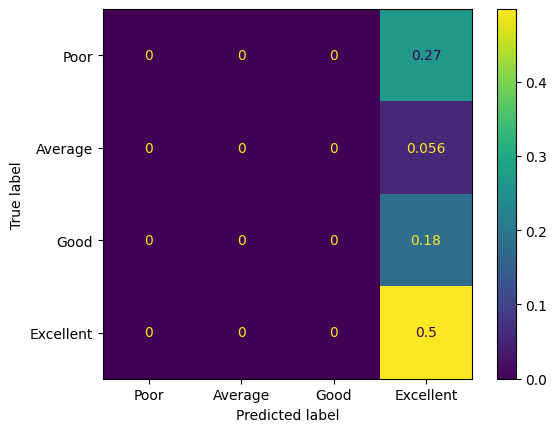

In [122]:
# Plot confusion matrix for DummyClassifier on training set only
ConfusionMatrixDisplay.from_estimator(
    base_clf,
    X_train,
    y_train,
    display_labels=['Poor', 'Average', 'Good', 'Excellent'],
    normalize='all', #shows proportion
    cmap='viridis'
)

In [123]:
# <Student to fill this section>
baseline_performance_explanations = """
The DummyClassifier achieved an accuracy of ~49.75%, which simply reflects the proportion of the most frequent class (‘Excellent’) in the training set.
The precision, recall, and F1-scores are very low across all classes except ‘Excellent’, which it always predicts.
The confusion matrix confirms this — all predictions default to ‘Excellent’, highlighting the classifier’s inability to distinguish between categories.
This sets a baseline to compare meaningful models against.
"""

In [124]:
# Do not modify this code
print_tile(size="h3", key='baseline_performance_explanations', value=baseline_performance_explanations)